# Исследование игрового рынка 

### Изучение общей информации. 

In [1]:
import pandas as pd 
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


везде верхний регистр в названиях, не порядок 

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data[data['user_score']=='tbd']['name'].count()

2424

вывод: существует проблема с типами данных (числовое значение user_score имеет тип string (из-за tbd(по сути это отсутсвие какого либо значение поэтому заменим на NaN))) , 
<br>самые важные столбцы не имеют пропусков(name 2 пропуска , удалим данные строки,platform,year_of_release имеется небольшое количество пропусков,genre и продажи) 
<br>также присутствует большое количество невосполнимых пропусков в столбцах rating user_score critic_score (основные причины пропусков есть 2 , 1-игра вышла давно , ещё раньше системы рейтингов (пример марио) 2-недостаточно оценок для присуждения какого либа рейтинга)
<br>явные дубликаты отсутствуют , неявные дубликаты присутсвуют в большом количестве в столбце name (причины 2 , 1-наличие спец версий для разных регионов 2-наличие различных "элитных" версий игр (также есть данные для разных платформ , но я их не считаю за дубликаты)
<br>странные значений обнаружено не было

In [8]:
data.duplicated(['name','platform']).sum()

5

In [76]:
data = data[~(data.duplicated(['name','platform']))]

Описание данных: существует проблема с типами данных (числовое значение user_score имеет тип string (из-за tbd(по сути это отсутсвие какого либо значение поэтому заменим на NaN))) , 
<br>самые важные столбцы не имеют пропусков(name 2 пропуска , удалим данные строки,platform,year_of_release имеется небольшое количество пропусков,genre и продажи) 
<br>также присутствует большое количество невосполнимых пропусков в столбцах rating user_score critic_score (основные причины пропусков есть 2 , 1-игра вышла давно , ещё раньше системы рейтингов (пример марио) 2-недостаточно оценок для присуждения какого либа рейтинга)
<br>явные дубликаты отсутствуют , неявные дубликаты присутсвуют в большом количестве в столбце name (причины 2 , 1-наличие спец версий для разных регионов 2-наличие различных "элитных" версий игр (также есть данные для разных платформ , но я их не считаю за дубликаты)
<br>странные значений обнаружено не было
<br><br>Цель:найти основные факторы которые нужны для выпуска успешной игры 
<br><br>План работы:
<br>1-Рассмотреть общие данные (продажи,года , платформы , оценки) 
<br>2-после этого посмотреть различные зависимости продаж от разных метрик 
<br>3-рассмотреть данные по разным регионам , найти сходства и различия 
<br>4-проверить гипотезы 

### Предобработка данных

In [10]:
data['user_score']=pd.to_numeric(data['user_score'],errors='coerce')
data['user_score']=data['user_score']*10
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


для того чтобы не было путаницы , домножили на 10 оценки игроков (теперь у нас имеется единная 100 бальная система оценивания игр)  

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [12]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [13]:
isna_data = data.isna().sum()

In [14]:
isna_data.sort_values(ascending = False)

user_score         9123
critic_score       8576
rating             6764
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

<AxesSubplot: title={'center': 'isna'}, xlabel='column', ylabel='number of passes'>

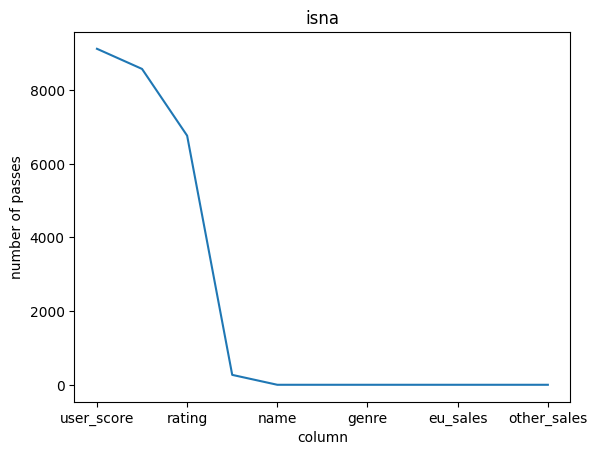

In [16]:
isna_data.sort_values(ascending = False).plot(title ='isna',xlabel = 'column',ylabel = 'number of passes')

In [17]:
print(data.duplicated().sum())
data['name'].duplicated().sum()

0


5154

в выводе выше написал откуда столько дубликатов 

In [18]:
#for value in data['name'].sort_values().unique():  print(value)  

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>закоментировал вывод всех имён в столбик , вы же правда не хотите листать тысячи строк в пустую? 
<br>в выводе по данным основную проблему с дубликатами описал 
</div>

проверил есть ли версии этих игр без пробелов
<br> Beyblade Burst
<br> Fire Emblem Fates
<br> Frozen: Olaf's Quest
<br> Haikyu!! Cross Team Match!
<br> Tales of Xillia 2
<br>совпадений не выявлено 


In [19]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

ух сколько платформ , полез в интернет изучать что за платформы и с чем их едят 

In [20]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [21]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
_ = ['na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score']
for item in _: print(data[item].describe())

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64
count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64
count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64
count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
N

In [24]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


добавили столбец с общимим продажами

In [25]:
data = data.drop (index=[ 16676 , 16709 ])
data[data['all_sales']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


убрали игры со значением продаж меньше 10к 

### Анализ данных

<AxesSubplot: title={'center': 'number of games by year'}, ylabel='Frequency'>

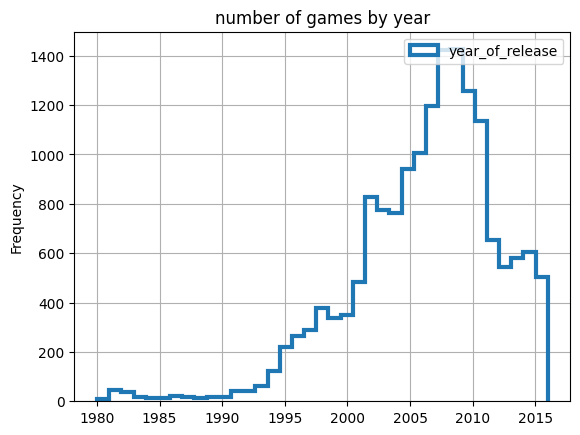

In [27]:
data.plot(kind = 'hist',y = 'year_of_release',linewidth = 3,grid = True,histtype = 'step',bins = 37,title ='number of games by year',xlabel = 'year_of_release') 

будем считать информацию актуальной с 2013 года (выход нового поколения консолей PS4 и XOne) как правило выход новых поколений даёт возможность внедрять новые технологии в игры так как увеличивается вычислительная мощность, следовательно можно считать актуальными периоды текущего поколения консолей 

In [28]:
data_platform = data.pivot_table(index = 'platform',values = ['year_of_release','all_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_platform.columns = ['_'.join(col).rstrip('_') for col in data_platform.columns.values]
data_platform = data_platform.drop(['count_year_of_release','min_all_sales','mean_year_of_release','sum_year_of_release'],axis = 1)
data_platform = data_platform.reset_index()
data_platform.sort_values('count_all_sales',ascending = False)

,platform,mean_all_sales,median_all_sales,median_year_of_release,max_all_sales,max_year_of_release,min_year_of_release,count_all_sales,sum_all_sales
16,PS2,0.581375,0.230,2005.0,20.81,2011.0,2000.0,2160,1255.77
4,DS,0.374765,0.110,2008.0,29.80,2013.0,1985.0,2151,806.12
17,PS3,0.706504,0.270,2011.0,21.05,2016.0,2006.0,1330,939.65
26,Wii,0.687508,0.190,2009.0,82.54,2016.0,2006.0,1320,907.51
28,X360,0.769746,0.280,2010.0,21.82,2016.0,2005.0,1262,971.42
19,PSP,0.243218,0.090,2009.0,7.68,2015.0,2004.0,1209,294.05
15,PS,0.610576,0.260,1998.0,10.95,2003.0,1994.0,1197,730.86
13,PC,0.266448,0.050,2010.0,8.01,2016.0,1985.0,974,259.52
29,XB,0.312791,0.150,2004.0,8.48,2008.0,2000.0,824,257.74
6,GBA,0.386679,0.160,2003.0,15.84,2007.0,2000.0,822,317.85


платформы ниже WiiU нам не интересны , атари конечно молодцы , но прошла их эпоха
<br>Интересующие нас платформы критерии:есть выпуск игр в 2016 году , на платформе выпустили более 100 проектов , среднее значение общей прибыли >= 0.1 
<br>под наши критерии подходят такие платформы как : 
<br>WiiU(нюанс нинтенда выпустила эту консоль в 2012 году и в районе 2017-2018 года должно по циклу произойти смена поколений поэтому в 2017 может есть смысл ставить на эту платформу , но в 2018 лучше уже обходить стороной)
<br>XOne(прекрасная свежевыпущенная платформа)
<br>PS4(аналогично) 
<br>PSV под вопросом , очень маленькие средние продажи 
<br>3DS аналогично с WiiU
<br>X360,Wii,PS3 старое поколение с поддержкой в 2016 году 
<br>PC актуален уже долгое время и будет актуален
<br>чуть-чуть позже подробнее посмотрим эти платформы подробнее 


In [29]:
data_platform.sort_values('sum_all_sales',ascending = False)

,platform,mean_all_sales,median_all_sales,median_year_of_release,max_all_sales,max_year_of_release,min_year_of_release,count_all_sales,sum_all_sales
16,PS2,0.581375,0.230,2005.0,20.81,2011.0,2000.0,2160,1255.77
28,X360,0.769746,0.280,2010.0,21.82,2016.0,2005.0,1262,971.42
17,PS3,0.706504,0.270,2011.0,21.05,2016.0,2006.0,1330,939.65
26,Wii,0.687508,0.190,2009.0,82.54,2016.0,2006.0,1320,907.51
4,DS,0.374765,0.110,2008.0,29.80,2013.0,1985.0,2151,806.12
15,PS,0.610576,0.260,1998.0,10.95,2003.0,1994.0,1197,730.86
6,GBA,0.386679,0.160,2003.0,15.84,2007.0,2000.0,822,317.85
18,PS4,0.801378,0.200,2015.0,14.63,2016.0,2013.0,392,314.14
19,PSP,0.243218,0.090,2009.0,7.68,2015.0,2004.0,1209,294.05
13,PC,0.266448,0.050,2010.0,8.01,2016.0,1985.0,974,259.52


<AxesSubplot: xlabel='median_year_of_release', ylabel='sum_all_sales'>

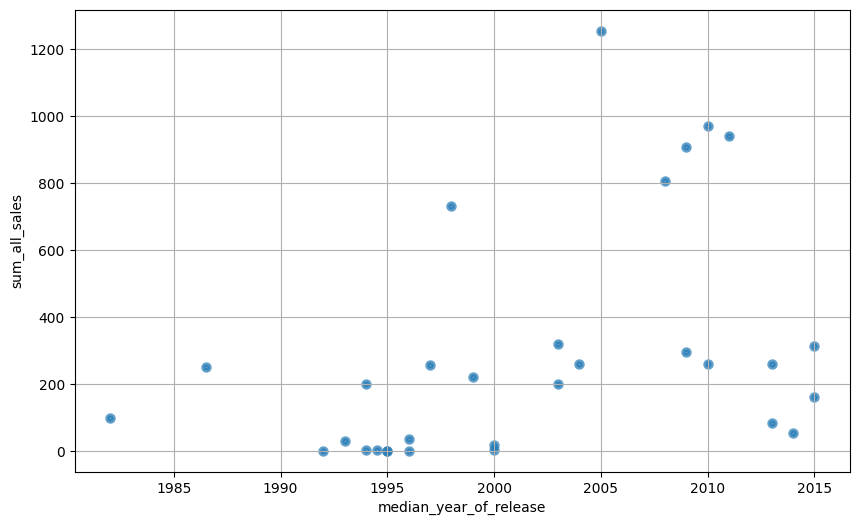

In [30]:
data_platform.plot(y = 'sum_all_sales',x = 'median_year_of_release',kind = 'scatter',linewidth = 3,grid = True,alpha = 0.7,figsize = (10,6))

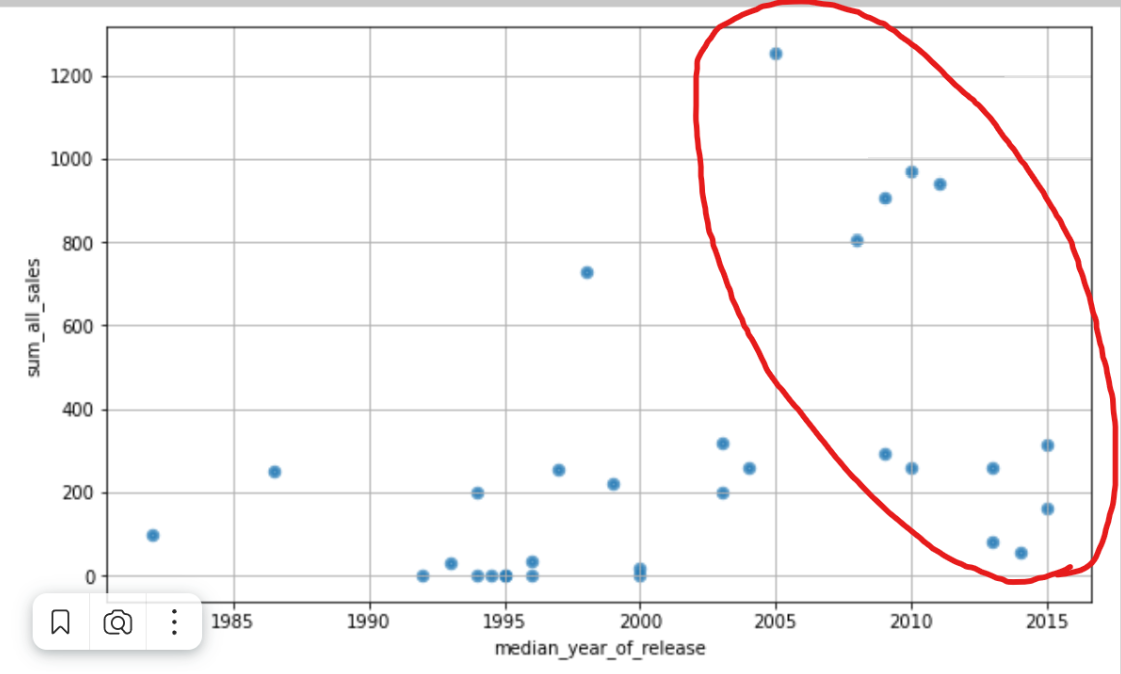 
<br>в красном круге представлены потенциально интересные платформы , давайте ниже их изучем подробнее

<AxesSubplot: title={'center': 'relevance of the platform'}, xlabel='median_year_of_release', ylabel='sum_all_sales'>

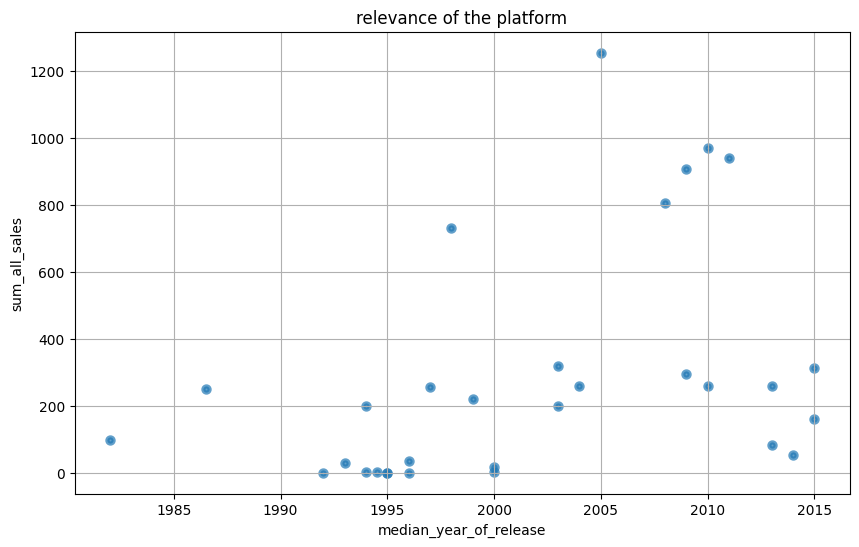

In [31]:
data_platform.plot(y = 'sum_all_sales',x = 'median_year_of_release',kind = 'scatter',linewidth = 3,grid = True,alpha = 0.7,figsize = (10,6),title='relevance of the platform')

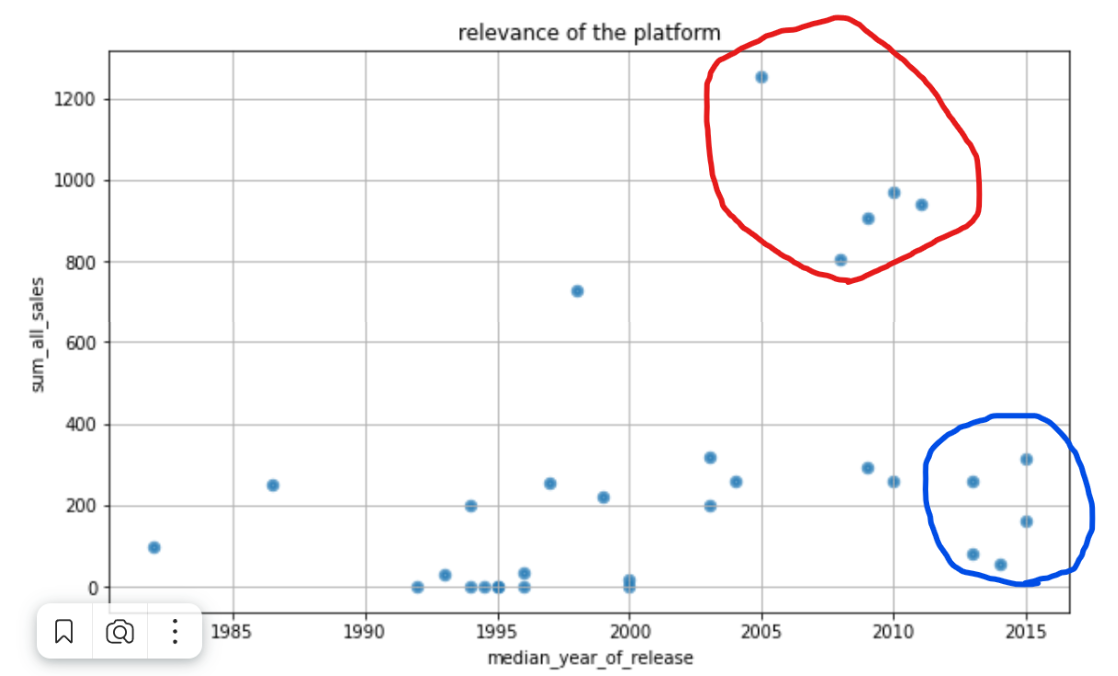
<br>в красном круге показаны платформы приносящие хорошую прибыль на данный момент (подробнее описание в выводе ниже)
<br>в синем круге показаны платформы которые возможно имеют потенциал(свежие ещё не раскрылись) 
<br>платформы ниже WiiU нам не интересны , атари конечно молодцы , но прошла их эпоха
<br>Интересующие нас платформы критерии:есть выпуск игр в 2016 году , на платформе выпустили более 100 проектов , среднее значение общей прибыли >= 0.1 
<br>под наши критерии подходят такие платформы как : 
<br>WiiU(нюанс нинтенда выпустила эту консоль в 2012 году и в районе 2017-2018 года должно по циклу произойти смена поколений поэтому в 2017 может есть смысл ставить на эту платформу , но в 2018 лучше уже обходить стороной)
<br>XOne(прекрасная свежевыпущенная платформа)
<br>PS4(аналогично) 
<br>PSV под вопросом , очень маленькие средние продажи 
<br>3DS аналогично с WiiU
<br>X360,Wii,PS3 старое поколение с поддержкой в 2016 году 
<br>PC актуален уже долгое время и будет актуален
<br>чуть-чуть позже подробнее посмотрим эти платформы подробнее 

рассмотрим 10 самых популярных платформ + вышеперичисленные платформы 

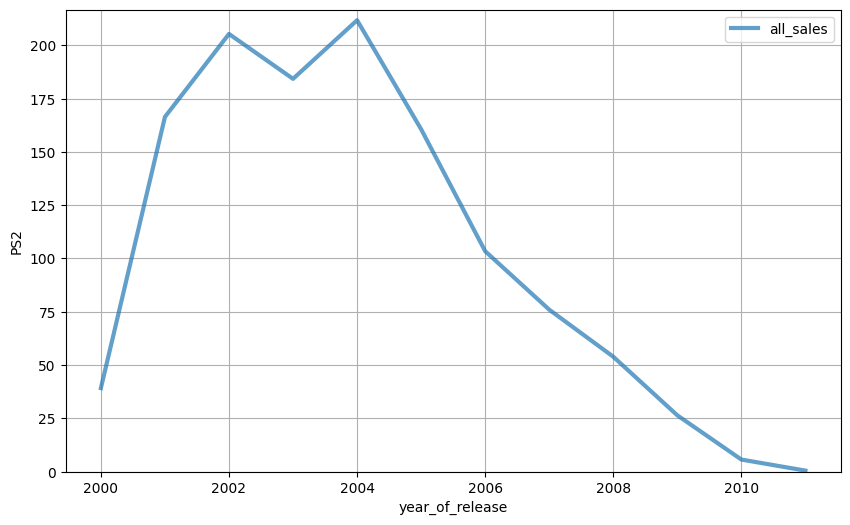

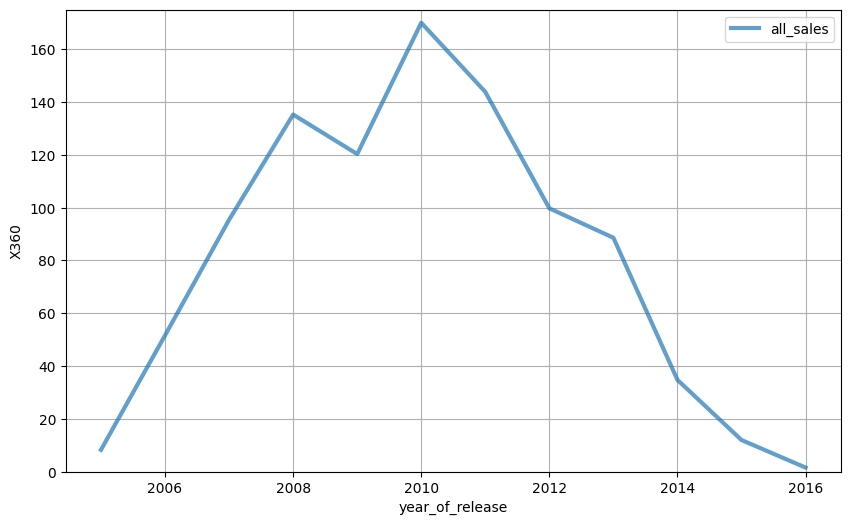

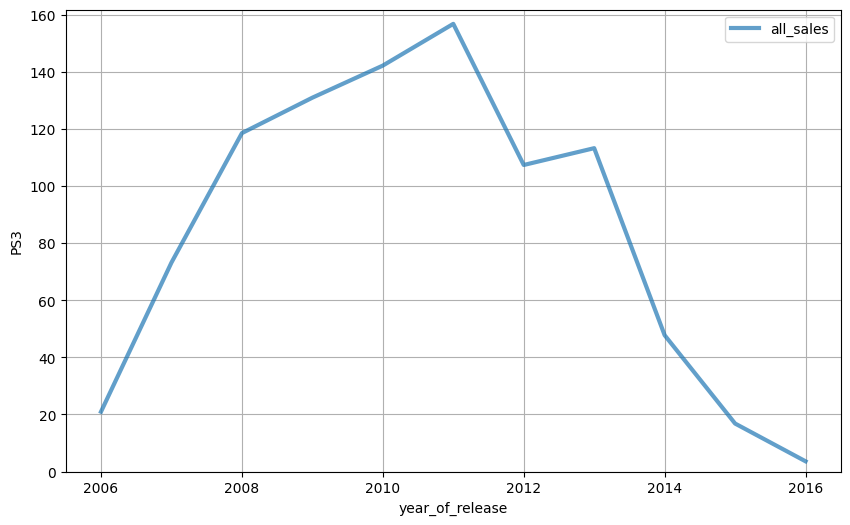

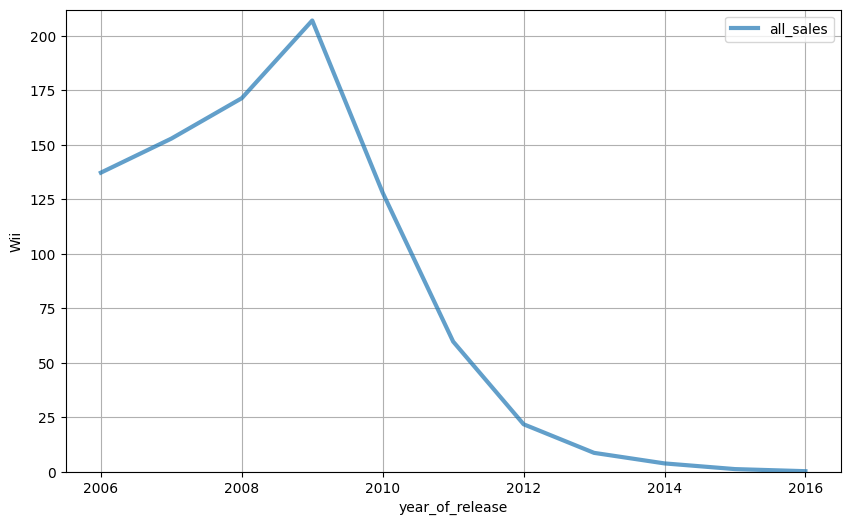

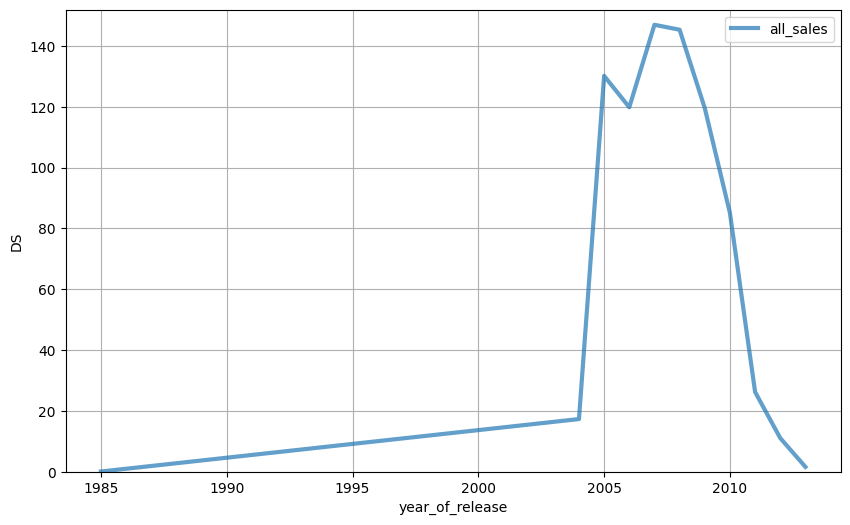

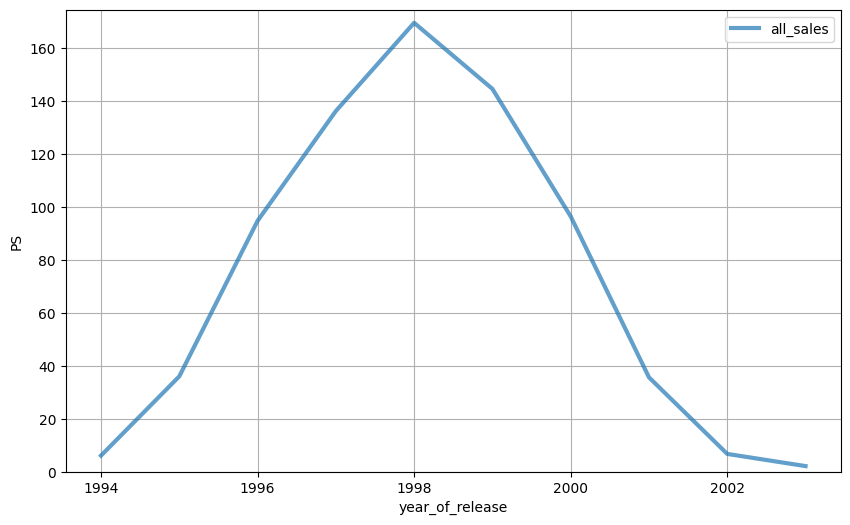

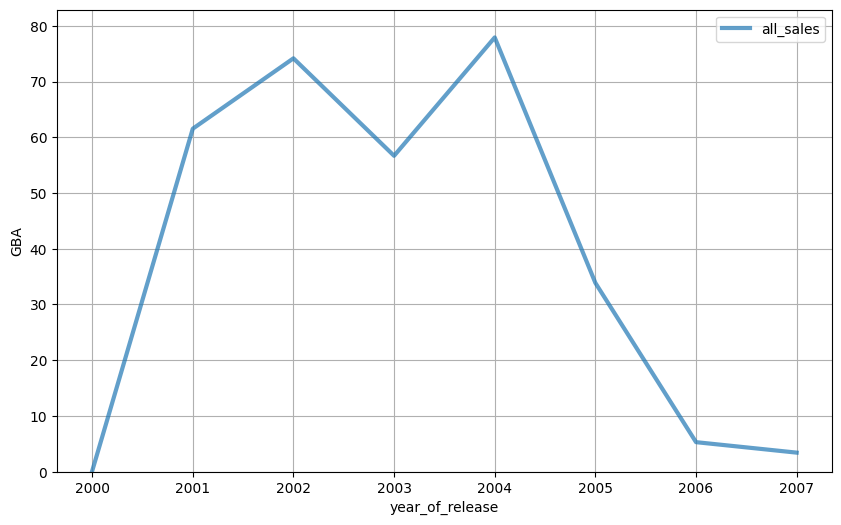

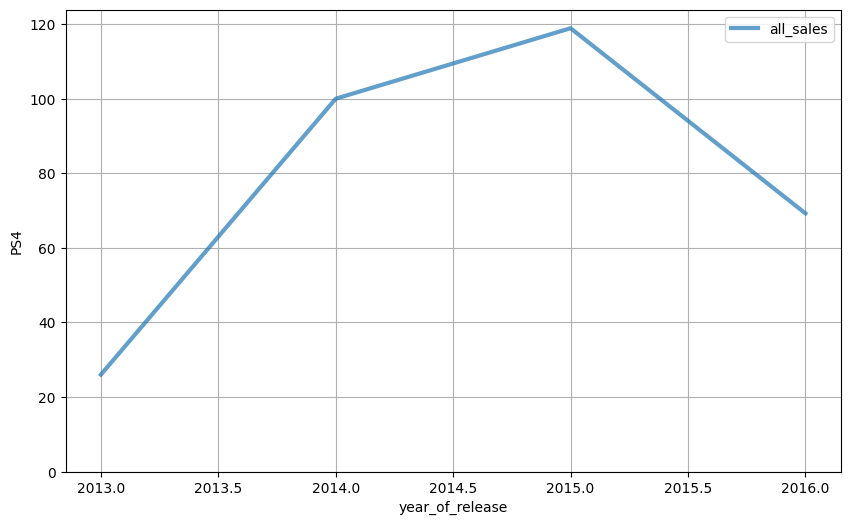

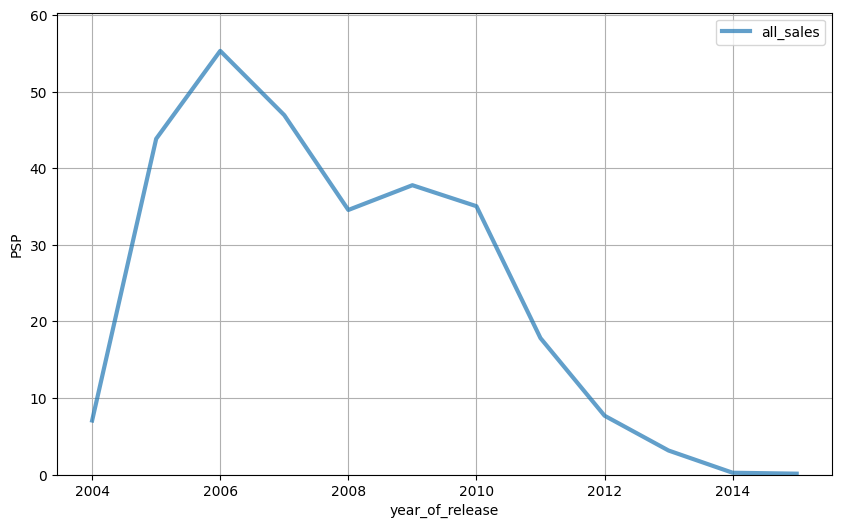

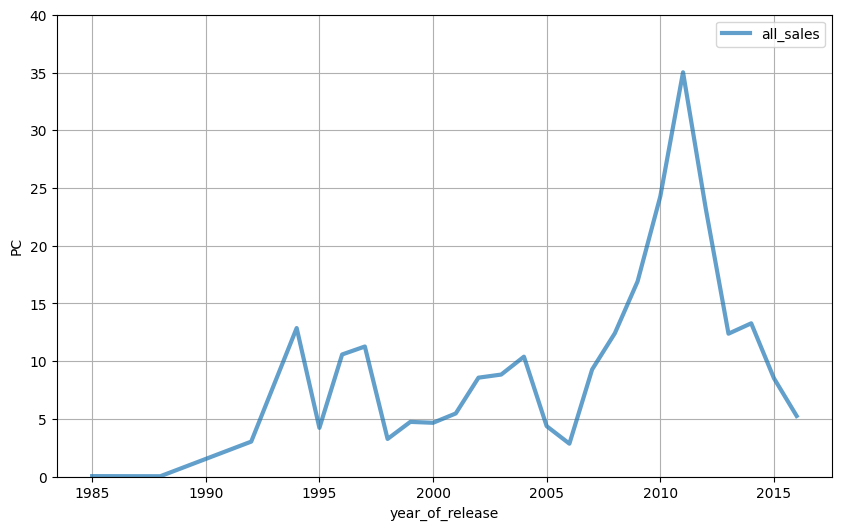

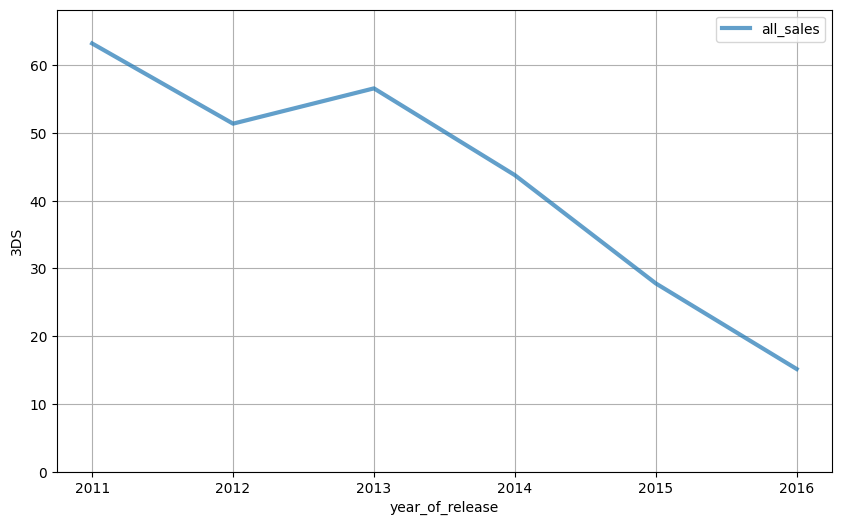

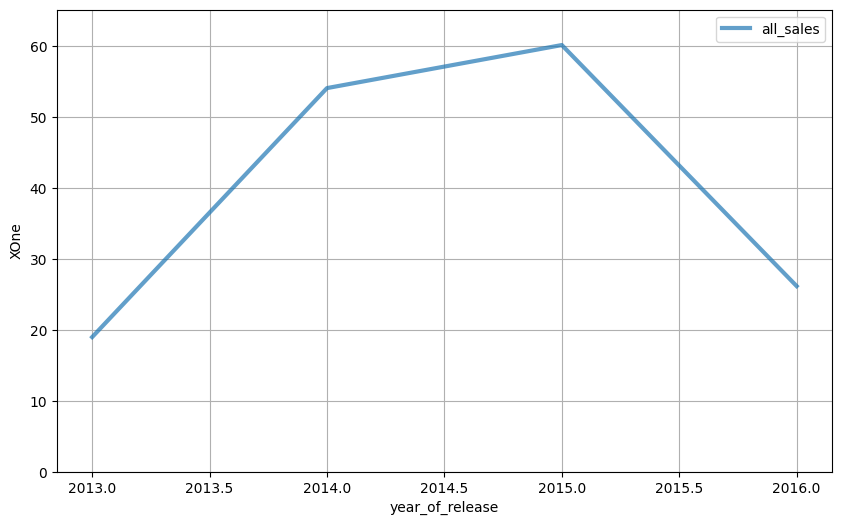

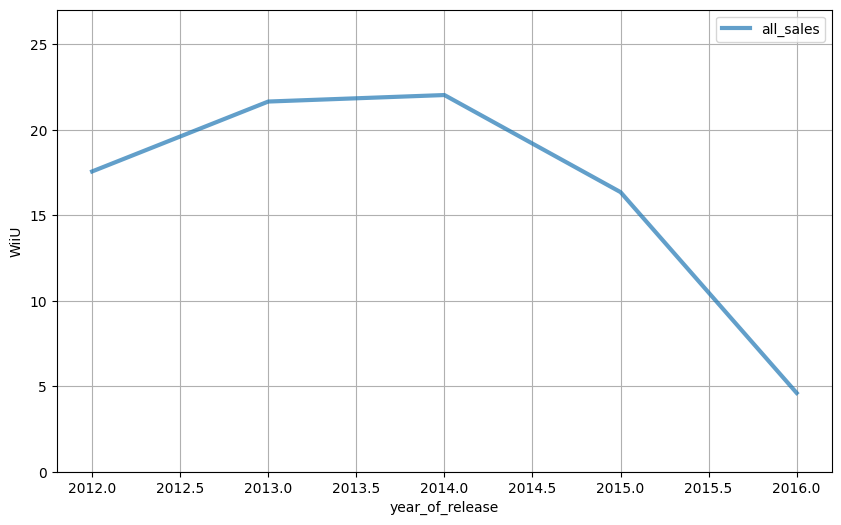

In [32]:
_ = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC','3DS','XOne','WiiU']
for item in _ : 
    __ = data[data['platform'] == item]
    __ = __.pivot_table(index = 'year_of_release',values = ['all_sales'],aggfunc = 'sum').reset_index()
    ___ = __['all_sales'].max()
    __.plot(y = 'all_sales',x = 'year_of_release',linewidth = 3,grid = True,alpha = 0.7,figsize = (10,6),ylim = (0,___ + 5),ylabel=item) 

'PS2'- хорошая платформа прожившая 10 лет , стандартное значение для настольных консолей (7лет основной цикл + 3года поддержка) снижение продаж случилось после 2004 года , но при этом продажи оставались на достойном уровне 
<br>'X360'- приблизительно такой же график с пиком через 4-5 лет , и циклом в 10 лет 
<br>'PS3'- аналогично с другими консолями график 
<br>'Wii'- популярная платформа  со сроком жизни 10 лет , после 2009 стала резко терять популятность к 2016 продаж практически не осталось 
<br>'DS'- я не понимаю откуда данные с 1985 по 2004 , но дальше случился выход консоли и 9 лет жизни на рынке 
<br>'PS'- аналогично с другими консолями график 
<br>'GBA'- срок жизни 7 лет 
<br>'PS4'- свежее поколение консоли которое ещё не достигло своего пика 
<br>'PSP'- аналогично с другими консолями график 
<br>'PC'- ПК всегда были актуальны , сейчас ничего не изменилось , не знаю с чем связан пик в 2010 , но в 2010 фиксировалась самая высокая активность на рынке 
<br>'3DS'- портативка , переживает снижение количества продаж 
<br>'XOne'- аналогично с PS4
<br>'WiiU'- относительно свежая консоль от нинтендо , но в 2017 уже готовиться смена поколений , поэтому снижение знач понятно 
<br><br>Вывод я бы поставил на 3 платформы PS4 , XOne , PC в таком-же порядке приоритета , также могу сказать что среднее время жизни консоли примерно 10 лет (7-8 консоль актуально 2-3 года просто поддержка консоли)

In [33]:
print((data_platform['max_year_of_release']- data_platform['min_year_of_release']).median())
(data_platform['max_year_of_release']- data_platform['min_year_of_release']).mean()

6.0


7.612903225806452

если учтём только те платформы которые я назвал , получим более близкие значения 

In [34]:
actual_data = data[data['year_of_release'] > 2012]
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [35]:
actual_data['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [36]:
def rating (income):
    try:
        if income == 'M':
            return '18'
        elif income == 'E':
            return '0'
        elif income == 'T':
            return '14'
        elif income == 'E10+':
            return '11'
    except:
        pass

перевили рейтинг в цифорки , так они намного удобнее 

In [37]:
actual_data['rating'] = actual_data['rating'].apply(rating)
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,18,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,18,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,None,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,18,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


In [38]:
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [39]:
actual_data = actual_data[actual_data['platform']!='DS']

DS умерло в 2013 , эта платформа нам не интересна 

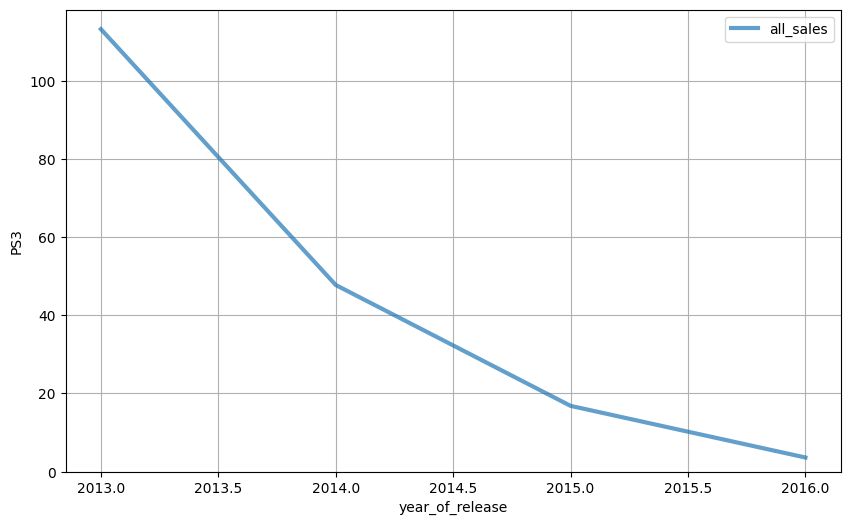

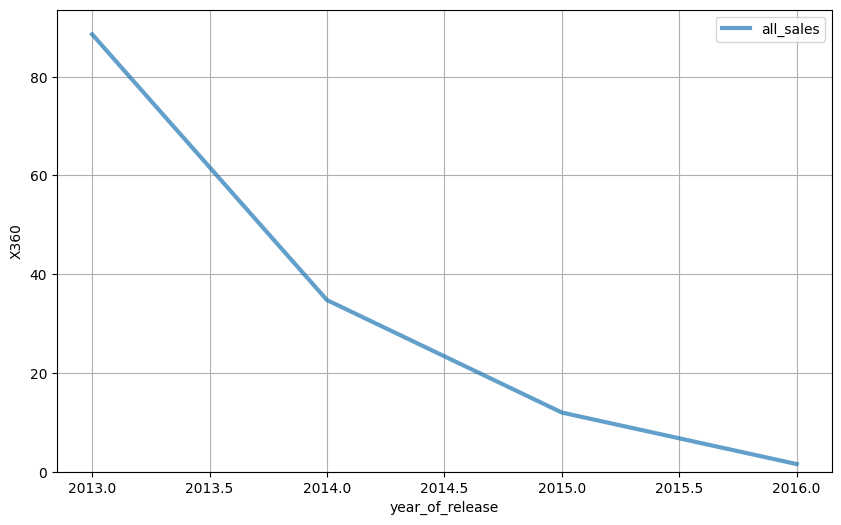

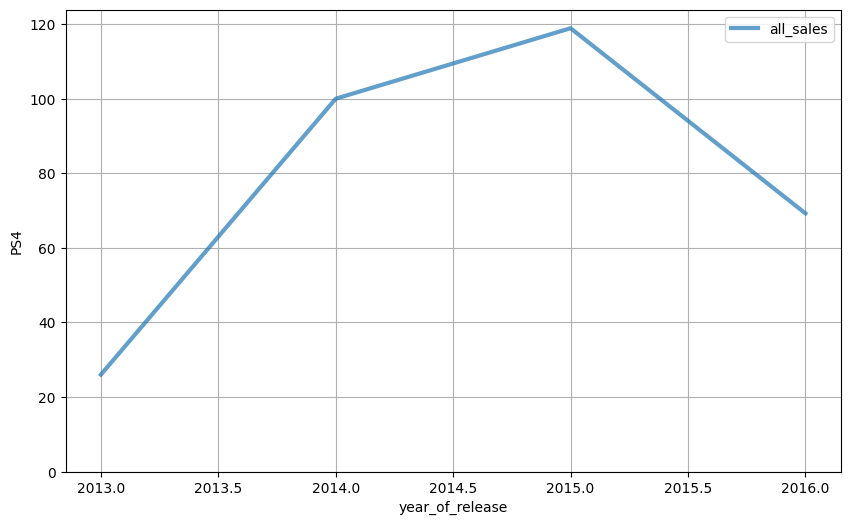

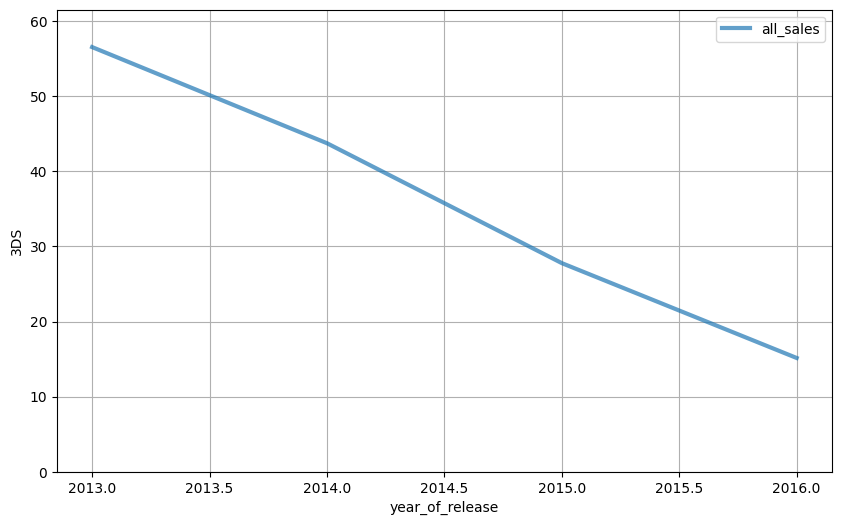

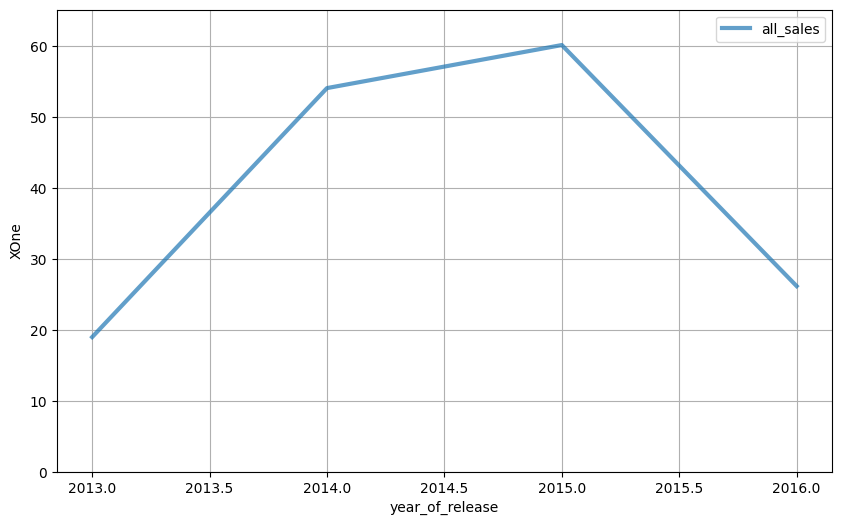

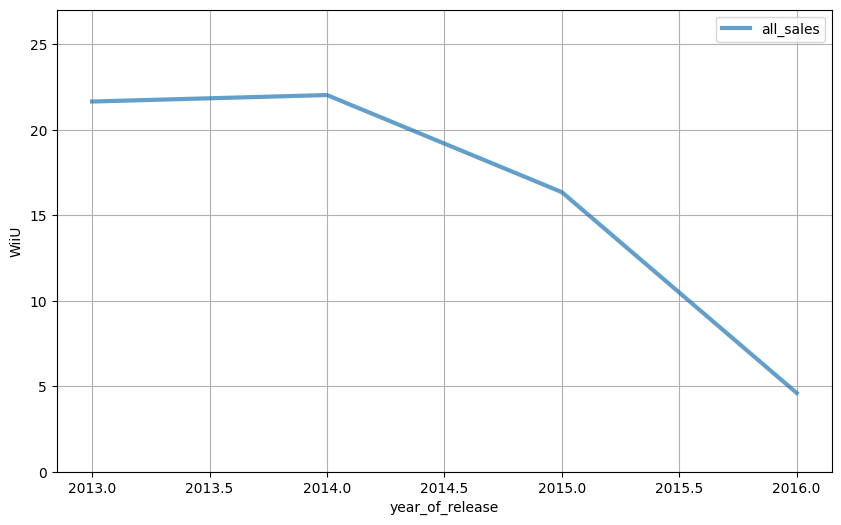

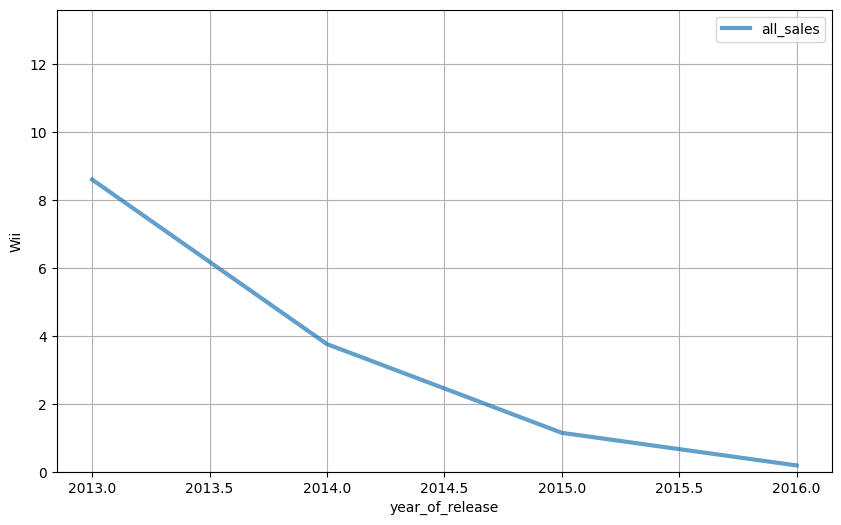

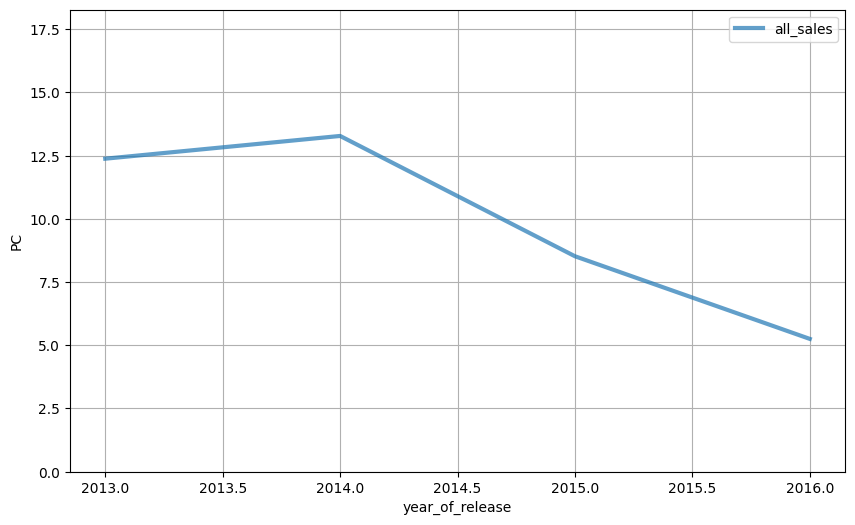

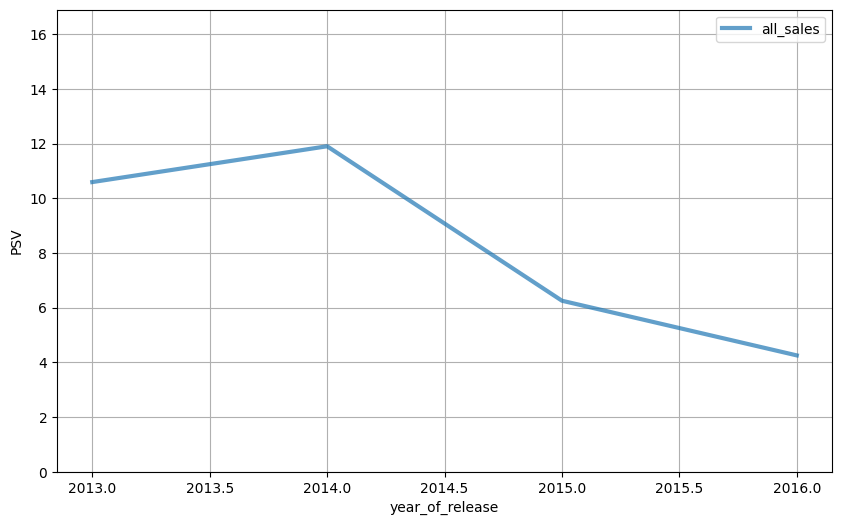

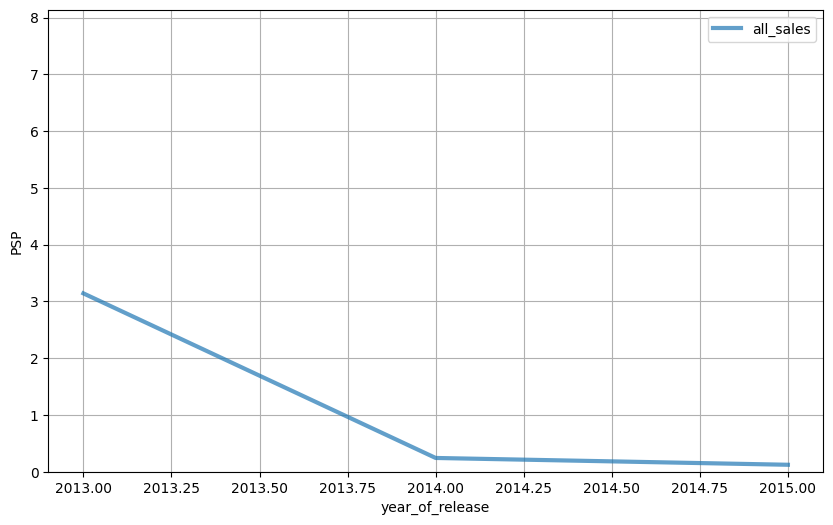

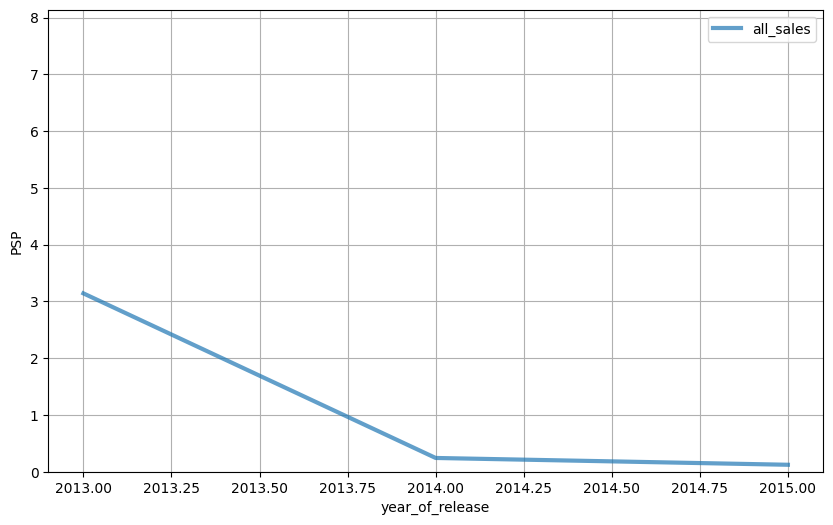

In [40]:
_ = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP', 'PSP']
for item in _ : 
    __ = actual_data[actual_data['platform'] == item]
    __ = __.pivot_table(index = 'year_of_release',values = ['all_sales'],aggfunc = 'sum').reset_index()
    ___ = __['all_sales'].max()
    __.plot(y = 'all_sales',x = 'year_of_release',linewidth = 3,grid = True,alpha = 0.7,figsize = (10,6),ylim = (0,___ + 5),ylabel=item)

'PS3'- объем продаж в пике был более 100млн , сейчас упал более чем в 10 раз - не прибыльно 
<br>'X360'- объем продаж в пике был более 80млн , сейчас упал более чем в 30 раз - не прибыльно 
<br>'PS4'- пик не достигнут , но объём продаж уже достигнут в размере 100млн - потенциально прибыльно 
<br>'3DS'- объем продаж в пике был более 40млн , сейчас упал более чем в 4 раз - не прибыльно 
<br>'XOne'- пик не достигнут , но объём продаж уже достигнут в размере 60млн - потенциально прибыльно 
<br>'WiiU' и 'Wii'- идут на снижение по количеству продаж , готовиться смена поколения - не прибыльно 
<br>'PC'- объем продаж в пике за последние 4 года был более 10млн , сейчас упал более чем в 2 раз - падение не связано с потерей актуальности (возможно не лучшие времена по железу(неудачные серии) но в следующем году должна быть представлена новая серия GTX , может с ней пойдёт вверх - потенциально прибыльно 
<br>'PSV'- объем продаж в пике был более 12млн , сейчас упал более чем в 2 раз - не прибыльно 
<br>'PSP'- объем продаж в пике был более 3млн , сейчас упал менее чем до млн - не прибыльно 
<br><br>вывод: самая популярная платформа - PlayStation после неё идёт Xbox и nintendo , также как альтернатива всегда есть ПК
<br>с растущей и затухающей прибылью , отметил выше


In [41]:
actual_data 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,18,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,18,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,None,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,18,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


PS3
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: all_sales, dtype: float64


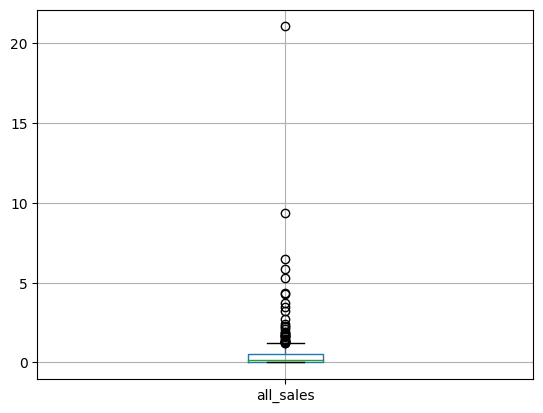

X360
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: all_sales, dtype: float64


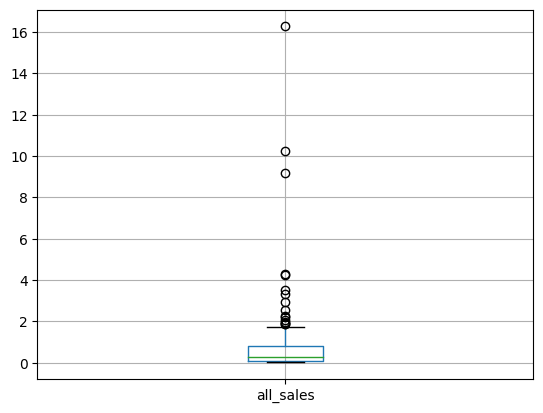

PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: all_sales, dtype: float64


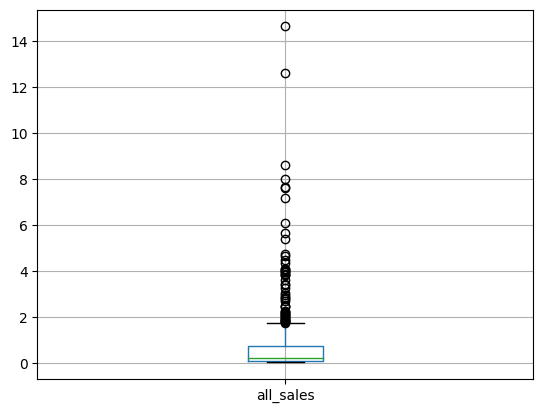

3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: all_sales, dtype: float64


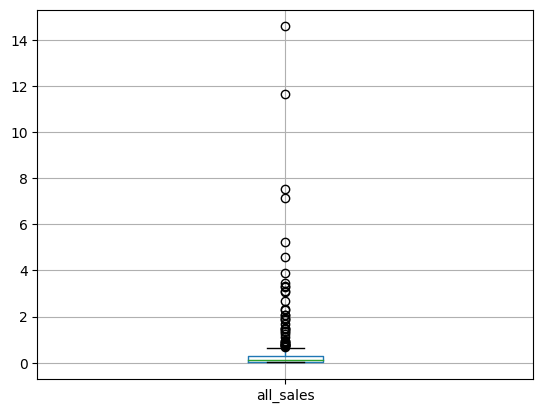

XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: all_sales, dtype: float64


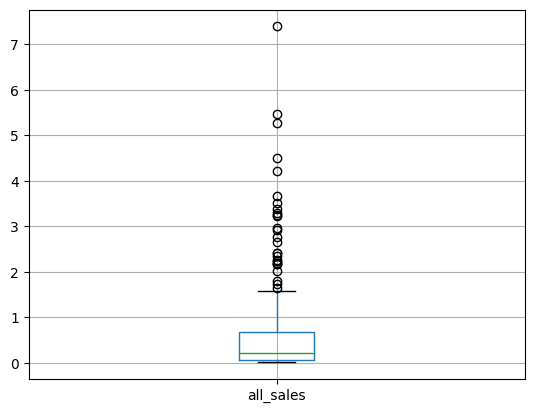

WiiU
count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: all_sales, dtype: float64


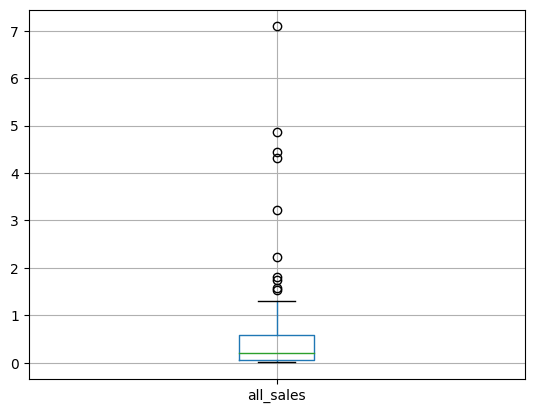

Wii
count    23.000000
mean      0.593913
std       0.915432
min       0.010000
25%       0.045000
50%       0.180000
75%       0.755000
max       3.580000
Name: all_sales, dtype: float64


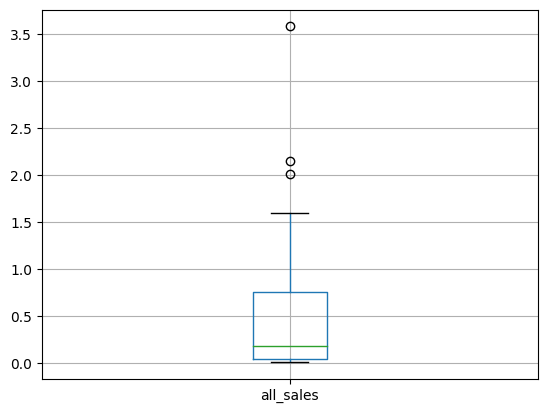

PC
count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: all_sales, dtype: float64


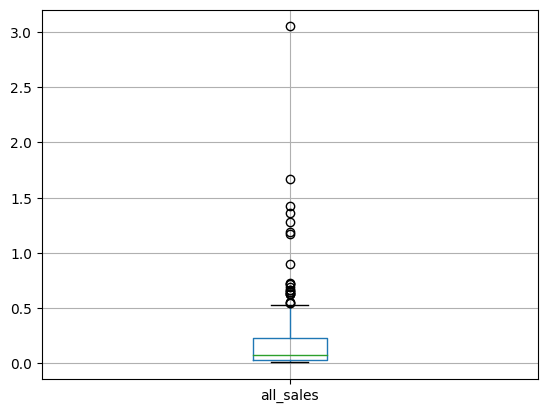

PSV
count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: all_sales, dtype: float64


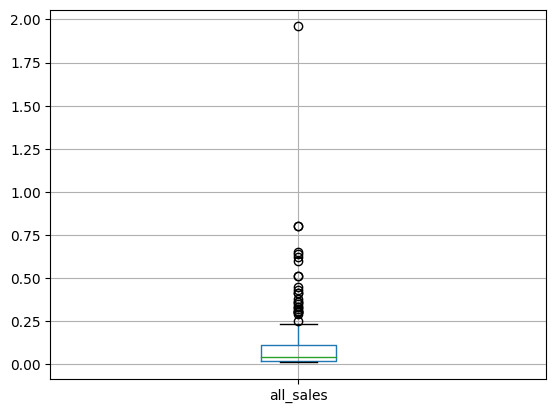

In [42]:
_ = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV']
for item in _ :
    __ = actual_data[actual_data['platform'] == item]
    __.boxplot('all_sales')
    print(item)
    print(__['all_sales'].describe())
    plt.show()

у всех консолей (кроме портативных) медиана примерна одинаковая в районе 0,2млн , у портативных консолей всё намного хуже ,медиана = несколько десятков тысяч , у пк что-то среднее 80к медиана 
<br> у PS 3-4 самое большое количество проектов превышающий Q3 , также всё не плохо у XBOX и пк (это означает что самые успешные проекты выходят именно на эти платформы)

<AxesSubplot: title={'center': 'boxplot by platform'}, xlabel='platform', ylabel='all_sales'>

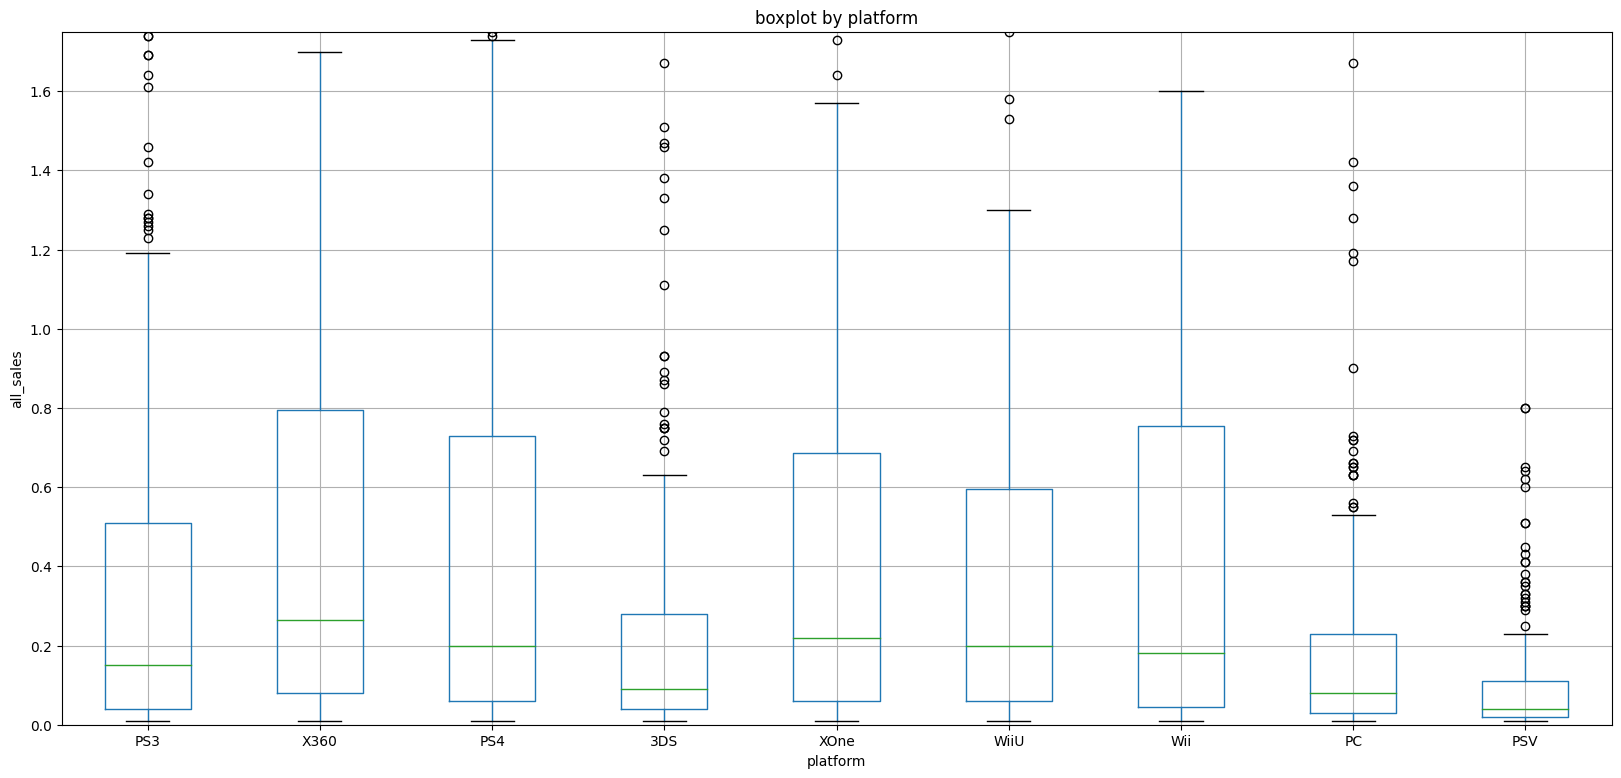

In [44]:
ac = actual_data
for item in _ :
    ac[item] = actual_data[actual_data['platform'] == item]['all_sales']
plt.figure(figsize=(20, 9))
plt.ylim(0, 1.75)
plt.title('boxplot by platform')
plt.ylabel('all_sales')
plt.xlabel('platform')
ac.boxplot(column=_)  

вывод остаётся прежним :
<br>у всех консолей (кроме портативных PS) медиана примерна одинаковая в районе 0,2млн , у портативных консолей всё намного хуже ,медиана = несколько десятков тысяч , у пк что-то среднее 80к медиана 


PS3


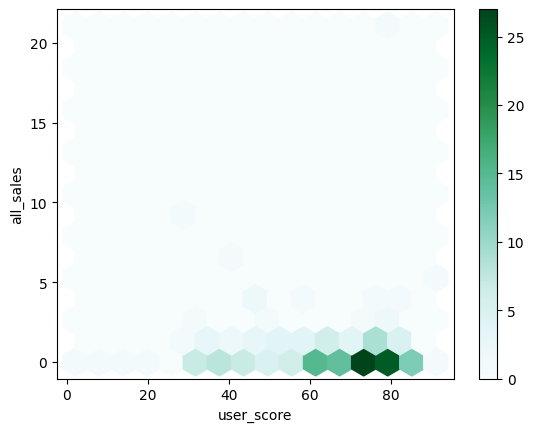

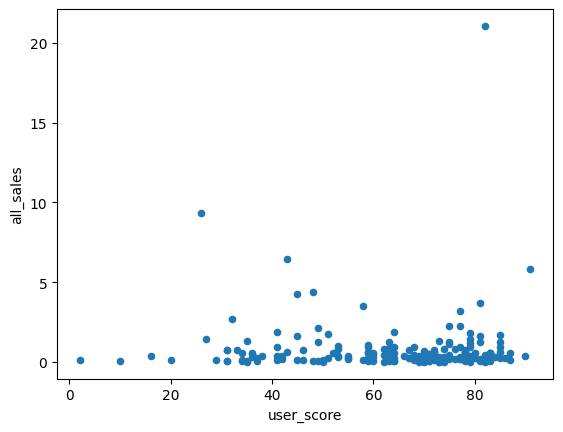

0.002394402735756711


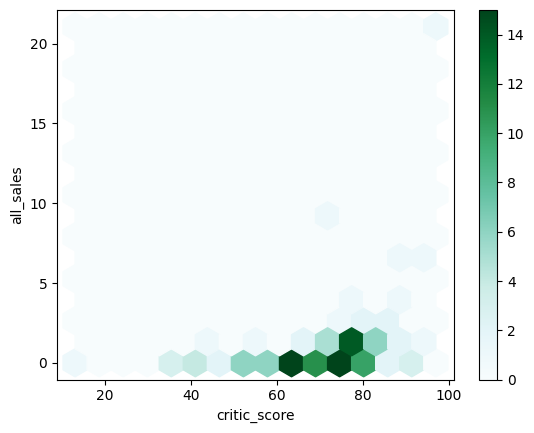

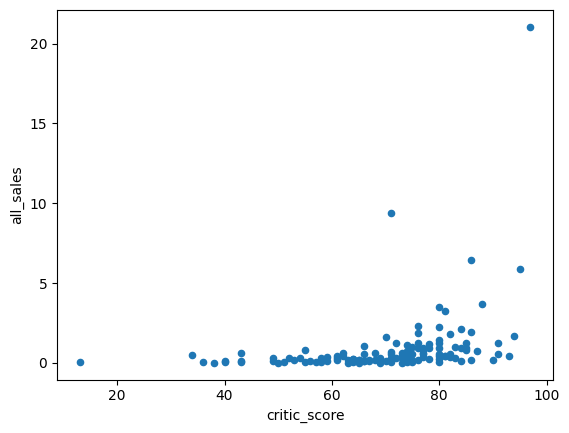

0.3342853393371919
X360


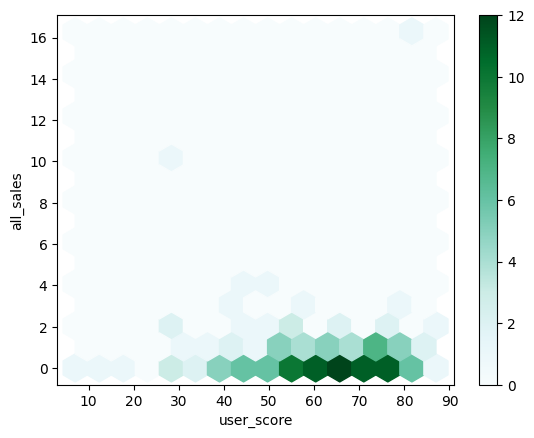

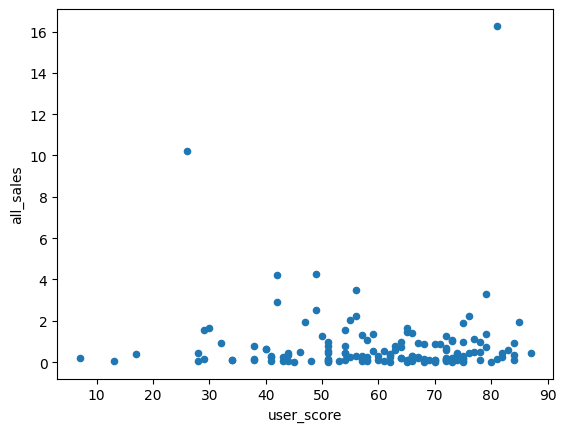

-0.011742185147181347


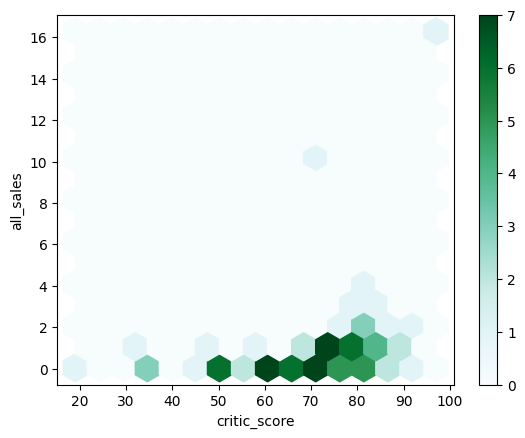

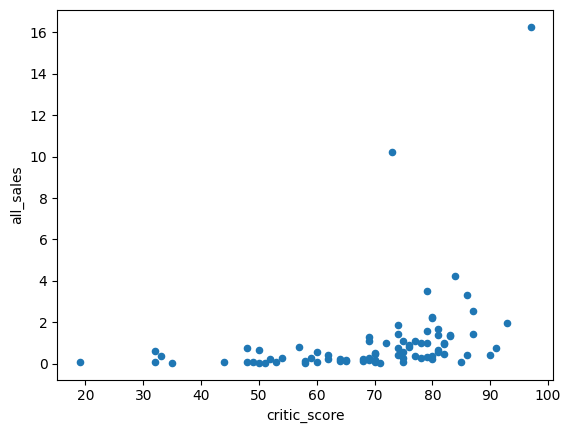

0.3503445460228664
PS4


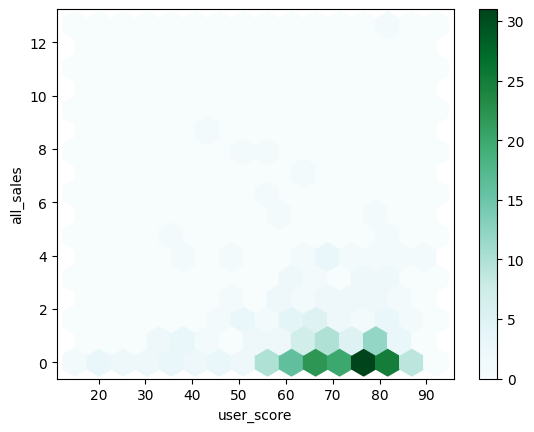

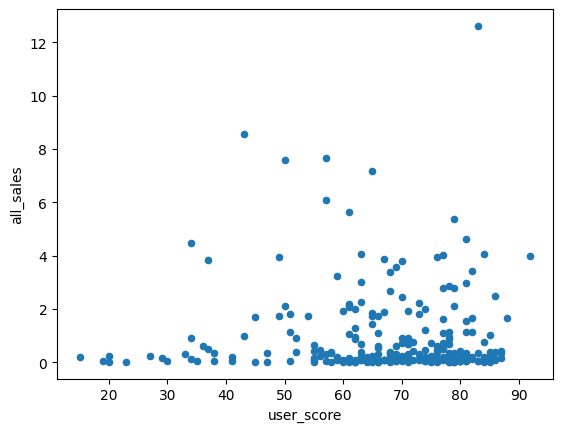

-0.03195711020455644


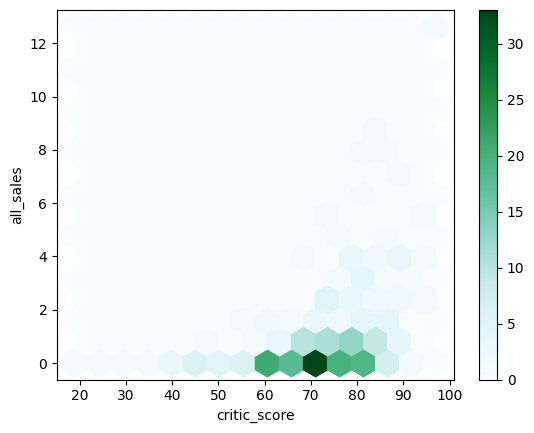

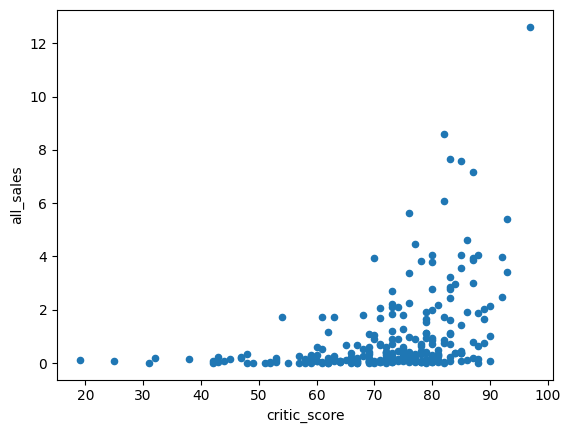

0.4065679020617816
XOne


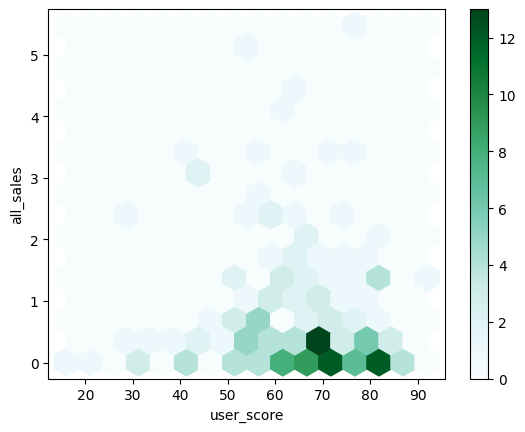

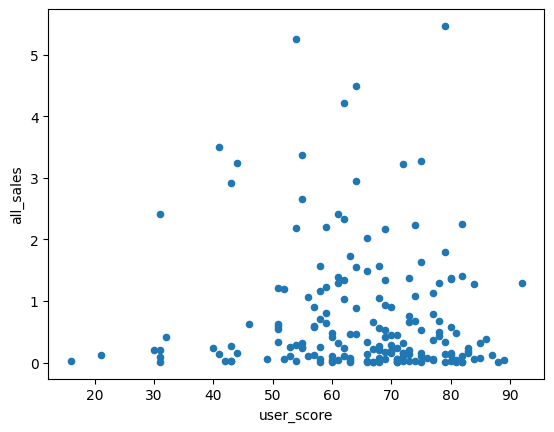

-0.0689250532827942


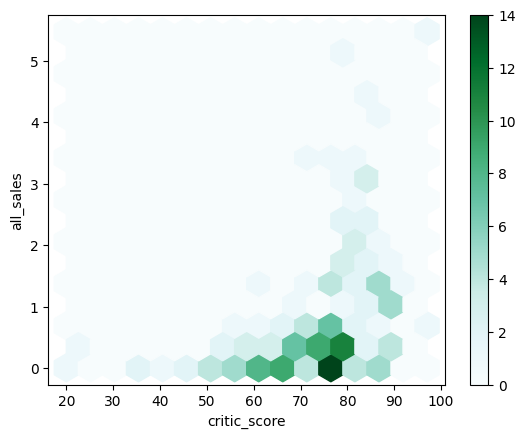

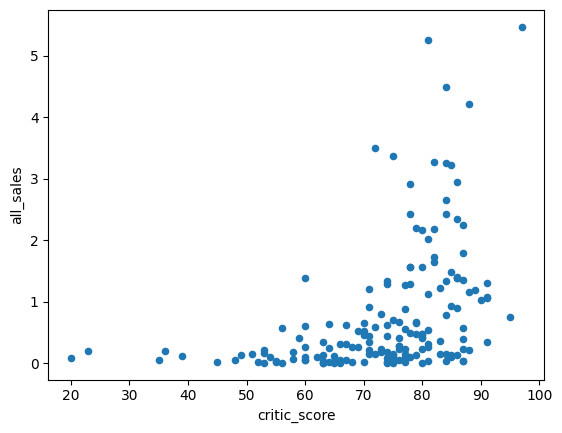

0.4169983280084017
PC


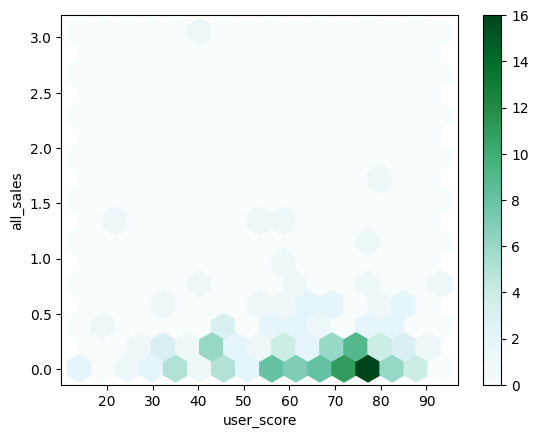

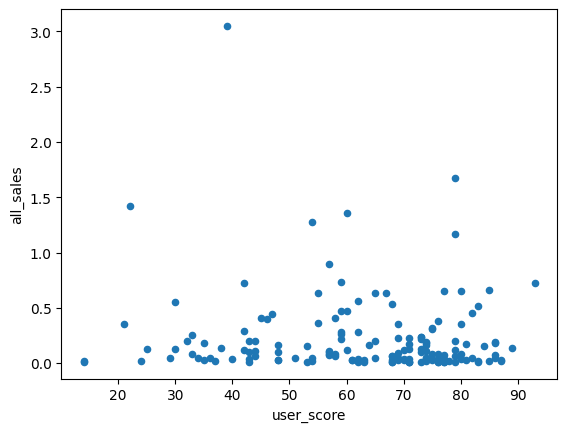

-0.09384186952476756


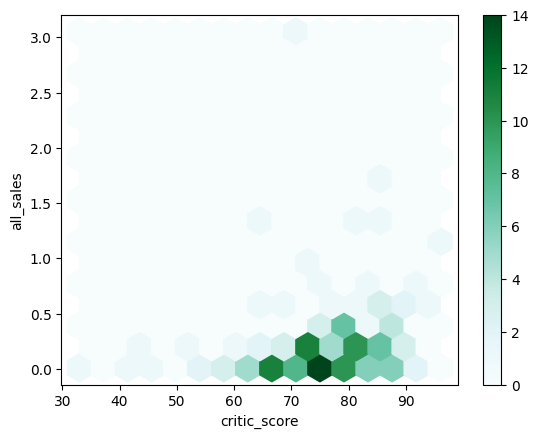

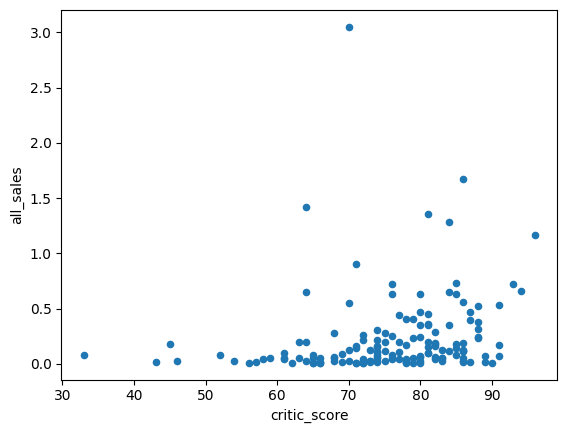

0.1960302829436937


In [45]:
_ = ['PS3', 'X360', 'PS4', 'XOne', 'PC']
for item in _ :
    __ = actual_data[actual_data['platform'] == item]
    print(item)
    __.plot(x = 'user_score' , y = 'all_sales' , kind = 'hexbin',gridsize = 15)
    plt.show()
    __.plot(x = 'user_score' , y = 'all_sales' , kind = 'scatter')
    plt.show()
    print(__['user_score'].corr(__['all_sales']))
    __.plot(x = 'critic_score' , y = 'all_sales' , kind = 'hexbin',gridsize = 15)
    plt.show()
    __.plot(x = 'critic_score' , y = 'all_sales' , kind = 'scatter')
    plt.show()
    print(__['critic_score'].corr(__['all_sales']))

Очень интересный и неожиданный вывод , критики лучше оценивают игры , чем игроки (целевая аудитория) как мы видим от оценки игроков успешность игры практически не зависит , а вот оценка критика может в некоторых случаях показать вероятность успеха 
<br> хуже всего игры оцениваются и теми и другими на ПК


In [46]:
actual_data[actual_data['critic_score']==actual_data['critic_score'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,...,all_sales,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,...,21.05,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,...,16.27,NaN,16.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,...,12.62,NaN,NaN,12.62,NaN,NaN,NaN,NaN,NaN,NaN
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,79.0,...,5.47,NaN,NaN,NaN,NaN,5.47,NaN,NaN,NaN,NaN


In [47]:
actual_data[actual_data['user_score']==actual_data['user_score'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,...,all_sales,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV
2851,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,0.21,0.46,0.00,0.05,93.0,93.0,...,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72,NaN
10959,Steins;Gate 0,PSV,2015.0,Adventure,0.00,0.03,0.05,0.01,86.0,93.0,...,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09


вот подтверждение слов , игра с макс оценкой у критиков показала по прадажам себя лучше  

<AxesSubplot: >

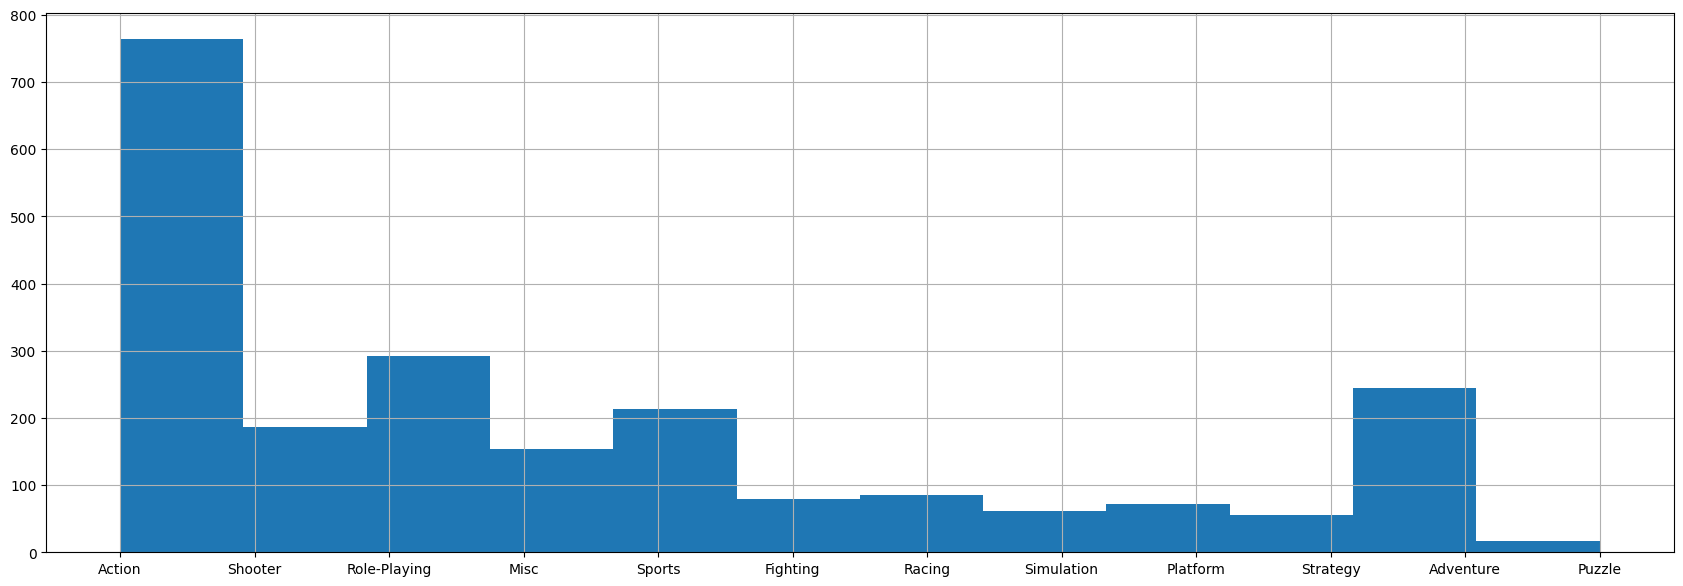

In [48]:
actual_data['genre'].hist(figsize = (21,7),bins = 12)

отсюда видим что выделяется жанр экшенов , за ним следует ещё три популярных жанра ролевые игры , приключения и спорт (самые многочисленные по выпуску игры) но нужно рассмотреть остальные параметры 

In [49]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,...,all_sales,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,...,21.05,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,...,16.27,NaN,16.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,...,14.63,NaN,NaN,14.63,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,...,14.60,NaN,NaN,NaN,14.6,NaN,NaN,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,...,12.62,NaN,NaN,12.62,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [50]:
data_genre = actual_data.pivot_table(index = 'genre',values = 'all_sales',aggfunc = ['mean','median','max','count','sum'])
data_genre.columns = ['_'.join(col).rstrip('_') for col in data_genre.columns.values]
data_genre.sort_values('count_all_sales',ascending = False)

,mean_all_sales,median_all_sales,max_all_sales,count_all_sales,sum_all_sales
genre,,,,,
Action,0.420641,0.110,21.05,764,321.37
Role-Playing,0.499623,0.125,14.60,292,145.89
Adventure,0.096762,0.030,1.66,244,23.61
Sports,0.707136,0.240,8.58,213,150.62
Shooter,1.245882,0.450,14.63,187,232.98
Misc,0.407403,0.105,9.18,154,62.74
Racing,0.469294,0.120,7.09,85,39.89
Fighting,0.441375,0.125,7.55,80,35.31
Platform,0.582500,0.225,4.32,72,41.94


по поводу количества игр я уже всё сказал 

In [51]:
data_genre.sort_values('median_all_sales',ascending = False)

,mean_all_sales,median_all_sales,max_all_sales,count_all_sales,sum_all_sales
genre,,,,,
Shooter,1.245882,0.450,14.63,187,232.98
Sports,0.707136,0.240,8.58,213,150.62
Platform,0.582500,0.225,4.32,72,41.94
Role-Playing,0.499623,0.125,14.60,292,145.89
Fighting,0.441375,0.125,7.55,80,35.31
Racing,0.469294,0.120,7.09,85,39.89
Action,0.420641,0.110,21.05,764,321.37
Misc,0.407403,0.105,9.18,154,62.74
Simulation,0.353279,0.100,5.22,61,21.55


как мы видем у шутеров самая высокая медиана продаж (средний шутер имеет больше скачиваний чем остальные жанры) , после него идут спортивные игры и платформеры. пазлы и приключения скачивают намного реже на 1 игру 

In [52]:
data_genre.sort_values('sum_all_sales',ascending = False)

,mean_all_sales,median_all_sales,max_all_sales,count_all_sales,sum_all_sales
genre,,,,,
Action,0.420641,0.110,21.05,764,321.37
Shooter,1.245882,0.450,14.63,187,232.98
Sports,0.707136,0.240,8.58,213,150.62
Role-Playing,0.499623,0.125,14.60,292,145.89
Misc,0.407403,0.105,9.18,154,62.74
Platform,0.582500,0.225,4.32,72,41.94
Racing,0.469294,0.120,7.09,85,39.89
Fighting,0.441375,0.125,7.55,80,35.31
Adventure,0.096762,0.030,1.66,244,23.61


ну и сумарно получается так что шутеры не сильно отстают от многочисленных экшен игр , после них идёт спорт и ролевые игры (опять же надо посмотреть на то как ситуация будет обстоять по регионам) 
<br><br>Вывод:вероятность прибыли шутеров намного выше чем у остальных жанров , но и спортивные игры с платформерами чувствуют себя не плохо 

### Портрет пользователя каждого региона

In [53]:
data_na = actual_data.pivot_table(index = 'platform',values = ['na_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_na.columns = ['_'.join(col).rstrip('_') for col in data_na.columns.values]
data_na.sort_values('sum_na_sales',ascending = False)

,mean_na_sales,median_na_sales,max_na_sales,min_na_sales,count_na_sales,sum_na_sales
platform,,,,,,
PS4,0.277398,0.06,6.03,0.0,392,108.74
XOne,0.377004,0.12,4.59,0.0,247,93.12
X360,0.439032,0.15,9.66,0.0,186,81.66
PS3,0.184058,0.03,7.02,0.0,345,63.50
3DS,0.126073,0.00,5.28,0.0,303,38.20
WiiU,0.254000,0.09,3.15,0.0,115,29.21
PC,0.058783,0.00,1.00,0.0,189,11.11
Wii,0.285217,0.04,1.88,0.0,23,6.56
PSV,0.014078,0.00,0.32,0.0,358,5.04


<AxesSubplot: title={'center': 'sales in na by platfoms'}, xlabel='platform', ylabel='sum_na_sales'>

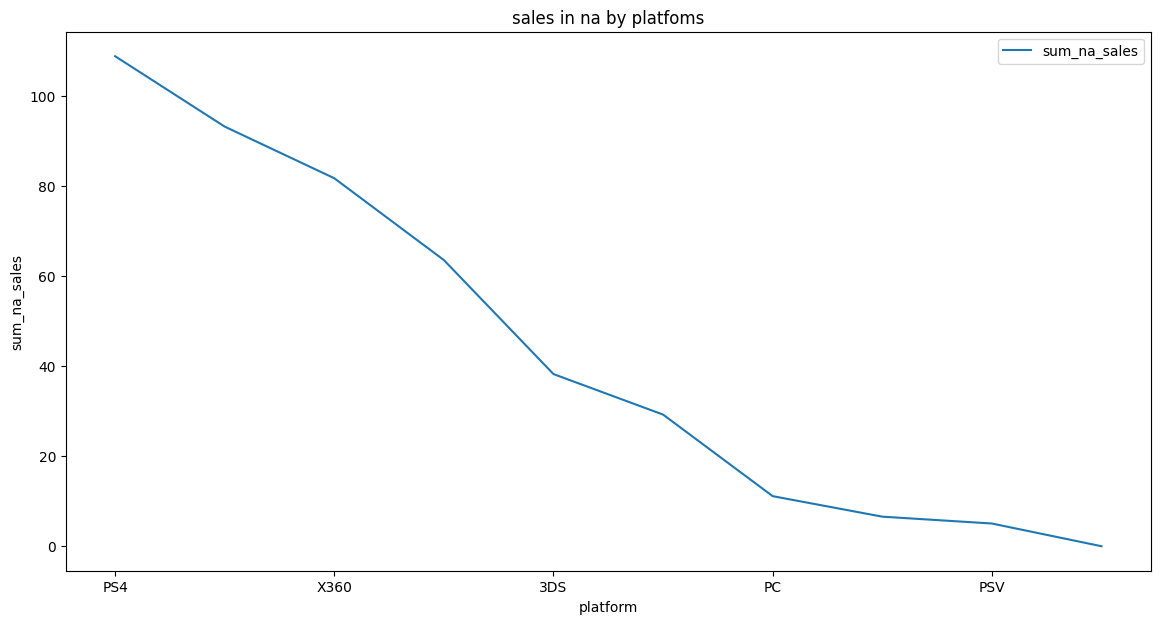

In [54]:
data_na.sort_values('sum_na_sales',ascending = False).plot(y = 'sum_na_sales',figsize=(14,7),title ='sales in na by platfoms',ylabel = 'sum_na_sales')

In [55]:
data_eu = actual_data.pivot_table(index = 'platform',values = ['eu_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_eu.columns = ['_'.join(col).rstrip('_') for col in data_eu.columns.values]
data_eu.sort_values('sum_eu_sales',ascending = False)

,mean_eu_sales,median_eu_sales,max_eu_sales,min_eu_sales,count_eu_sales,sum_eu_sales
platform,,,,,,
PS4,0.359923,0.08,6.31,0.0,392,141.09
PS3,0.196551,0.02,9.09,0.0,345,67.81
XOne,0.208866,0.07,2.19,0.0,247,51.59
X360,0.228602,0.08,5.14,0.0,186,42.52
3DS,0.102178,0.00,4.19,0.0,303,30.96
PC,0.134180,0.06,1.82,0.0,189,25.36
WiiU,0.172609,0.07,2.15,0.0,115,19.85
PSV,0.017039,0.00,0.64,0.0,358,6.10
Wii,0.257826,0.10,1.39,0.0,23,5.93


<AxesSubplot: title={'center': 'sales in eu by platfoms'}, xlabel='platform', ylabel='sum_eu_sales'>

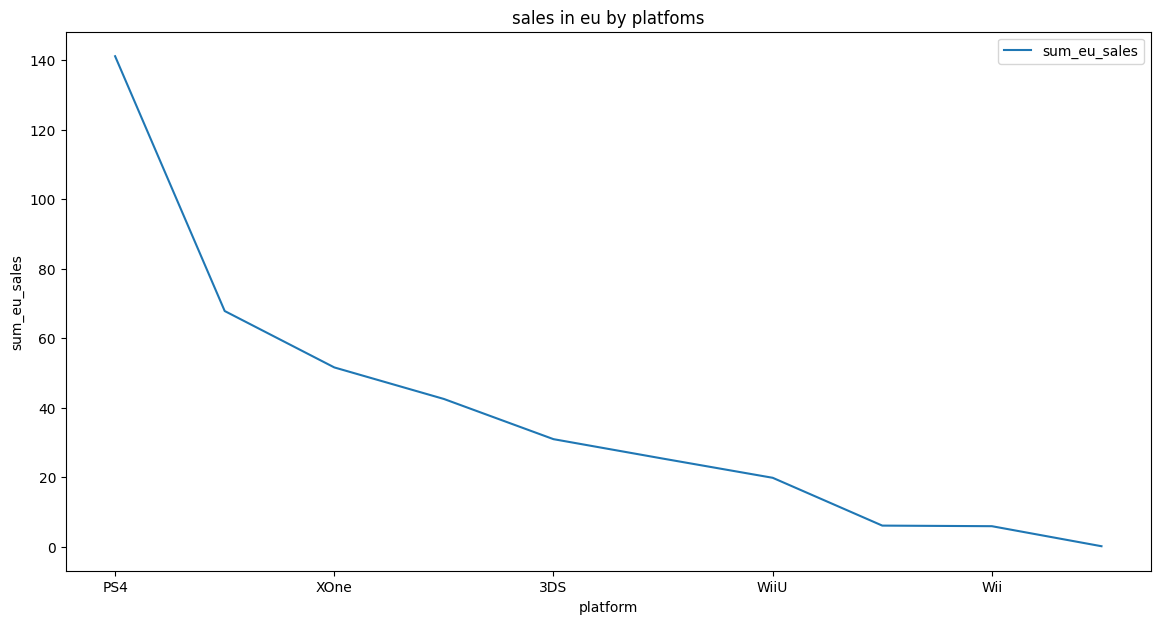

In [56]:
data_eu.sort_values('sum_eu_sales',ascending = False).plot(y = 'sum_eu_sales',figsize=(14,7),title ='sales in eu by platfoms',ylabel = 'sum_eu_sales')

In [57]:
data_jp = actual_data.pivot_table(index = 'platform',values = ['jp_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_jp.columns = ['_'.join(col).rstrip('_') for col in data_jp.columns.values]
data_jp.sort_values('sum_jp_sales',ascending = False)

,mean_jp_sales,median_jp_sales,max_jp_sales,min_jp_sales,count_jp_sales,sum_jp_sales
platform,,,,,,
3DS,0.223795,0.06,4.35,0.0,303,67.81
PS3,0.067681,0.03,0.98,0.0,345,23.35
PSV,0.051927,0.03,0.90,0.0,358,18.59
PS4,0.040714,0.01,0.49,0.0,392,15.96
WiiU,0.094609,0.00,1.46,0.0,115,10.88
PSP,0.049104,0.02,0.24,0.0,67,3.29
X360,0.002742,0.00,0.06,0.0,186,0.51
XOne,0.001377,0.00,0.04,0.0,247,0.34
Wii,0.002174,0.00,0.05,0.0,23,0.05


<AxesSubplot: title={'center': 'sales in jp by platfoms'}, xlabel='platform', ylabel='sum_jp_sales'>

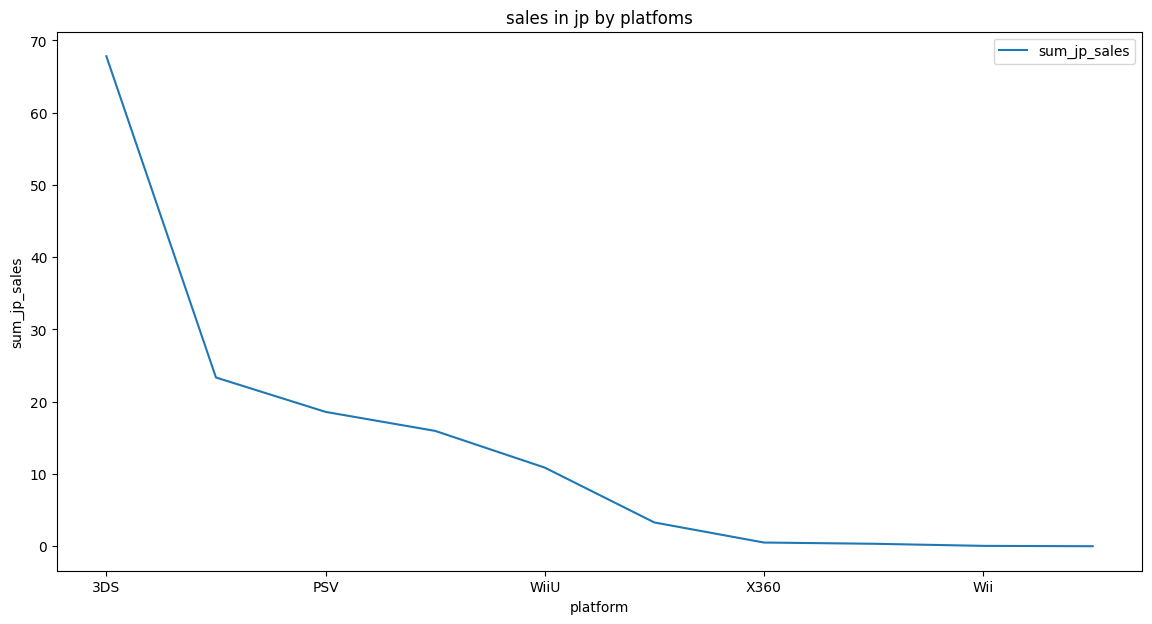

In [58]:
data_jp.sort_values('sum_jp_sales',ascending = False).plot(y = 'sum_jp_sales',figsize=(14,7),title ='sales in jp by platfoms',ylabel = 'sum_jp_sales')

выводы по платформам : в европе и северной америке преобладает консольный гейминг , в то время как в японии преобладают портатвки нинтендо , также полноценные консоли PS обладают чуть-чуть меньшею популярностью 

In [59]:
data_na = actual_data.pivot_table(index = 'genre',values = ['na_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_na.columns = ['_'.join(col).rstrip('_') for col in data_na.columns.values]
data_na.sort_values('sum_na_sales',ascending = False)

,mean_na_sales,median_na_sales,max_na_sales,min_na_sales,count_na_sales,sum_na_sales
genre,,,,,,
Action,0.164699,0.020,9.66,0.0,764,125.83
Shooter,0.586845,0.200,6.73,0.0,187,109.74
Sports,0.306432,0.080,2.49,0.0,213,65.27
Role-Playing,0.158904,0.020,5.28,0.0,292,46.40
Misc,0.178312,0.010,5.70,0.0,154,27.46
Platform,0.249028,0.090,2.11,0.0,72,17.93
Fighting,0.194375,0.045,3.27,0.0,80,15.55
Racing,0.152471,0.030,3.15,0.0,85,12.96
Adventure,0.029262,0.000,0.55,0.0,244,7.14


<AxesSubplot: title={'center': 'sales in na by genre'}, xlabel='genre', ylabel='sum_na_sales'>

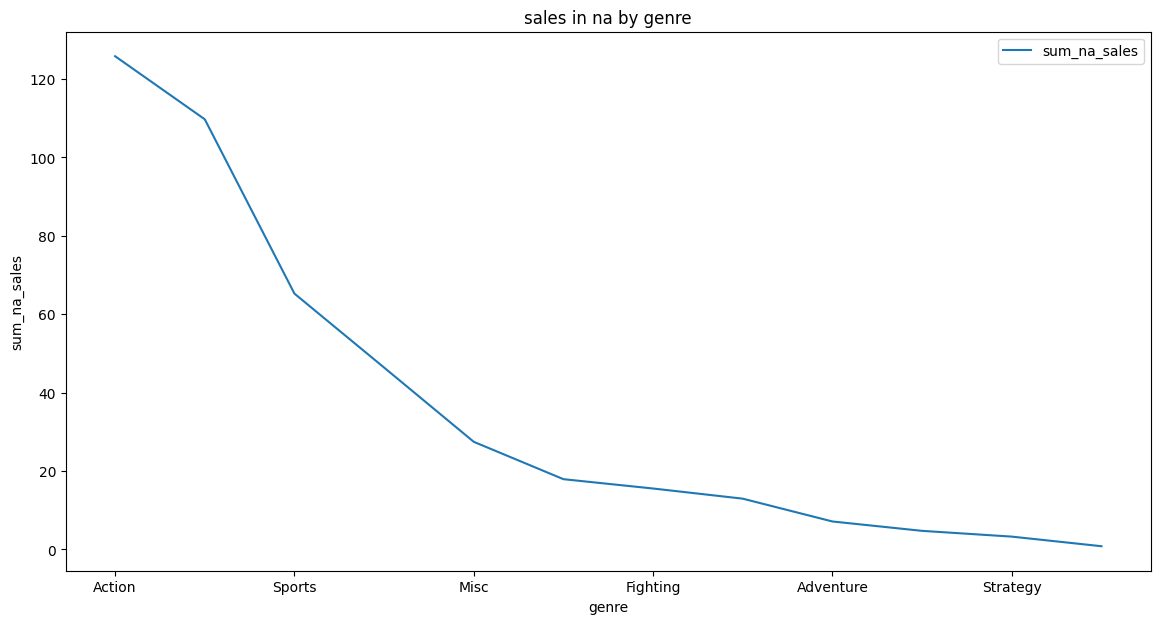

In [60]:
data_na.sort_values('sum_na_sales',ascending = False).plot(y = 'sum_na_sales',figsize=(14,7),title ='sales in na by genre',ylabel = 'sum_na_sales')

In [61]:
data_eu = actual_data.pivot_table(index = 'genre',values = ['eu_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_eu.columns = ['_'.join(col).rstrip('_') for col in data_eu.columns.values]
data_eu.sort_values('sum_eu_sales',ascending = False)

,mean_eu_sales,median_eu_sales,max_eu_sales,min_eu_sales,count_eu_sales,sum_eu_sales
genre,,,,,,
Action,0.154306,0.020,9.09,0.0,764,117.89
Shooter,0.469840,0.190,5.86,0.0,187,87.86
Sports,0.283991,0.050,6.12,0.0,213,60.49
Role-Playing,0.126610,0.010,4.19,0.0,292,36.97
Racing,0.237529,0.060,2.15,0.0,85,20.19
Misc,0.129870,0.010,2.65,0.0,154,20.00
Platform,0.210417,0.080,1.16,0.0,72,15.15
Simulation,0.177705,0.030,2.11,0.0,61,10.84
Fighting,0.106875,0.020,1.37,0.0,80,8.55


<AxesSubplot: title={'center': 'sales in eu by genre'}, xlabel='genre', ylabel='sum_eu_sales'>

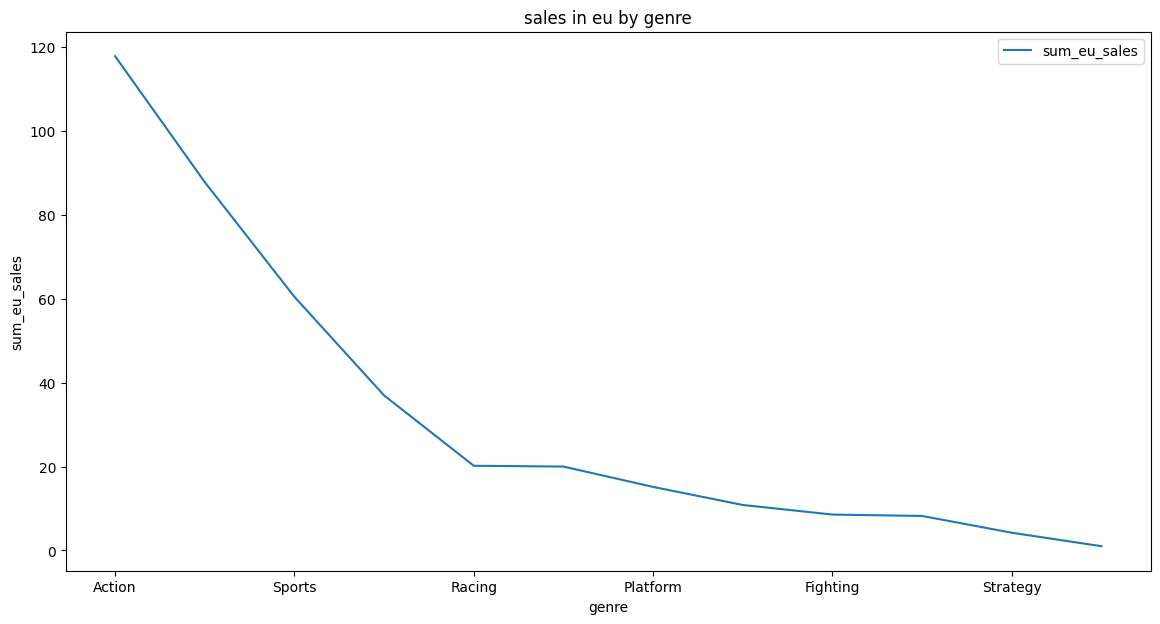

In [62]:
data_eu.sort_values('sum_eu_sales',ascending = False).plot(y = 'sum_eu_sales',figsize=(14,7),title ='sales in eu by genre',ylabel = 'sum_eu_sales')

In [63]:
data_jp = actual_data.pivot_table(index = 'genre',values = ['jp_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_jp.columns = ['_'.join(col).rstrip('_') for col in data_jp.columns.values]
data_jp.sort_values('sum_jp_sales',ascending = False)

,mean_jp_sales,median_jp_sales,max_jp_sales,min_jp_sales,count_jp_sales,sum_jp_sales
genre,,,,,,
Role-Playing,0.174795,0.05,4.35,0.0,292,51.04
Action,0.052997,0.01,2.79,0.0,764,40.49
Misc,0.059740,0.02,0.90,0.0,154,9.20
Fighting,0.095625,0.03,2.43,0.0,80,7.65
Shooter,0.035348,0.00,1.46,0.0,187,6.61
Adventure,0.023852,0.01,0.53,0.0,244,5.82
Sports,0.025399,0.00,0.26,0.0,213,5.41
Platform,0.066528,0.00,0.94,0.0,72,4.79
Simulation,0.074098,0.00,1.90,0.0,61,4.52


<AxesSubplot: title={'center': 'sales in jp by genre'}, xlabel='genre', ylabel='sum_jp_sales'>

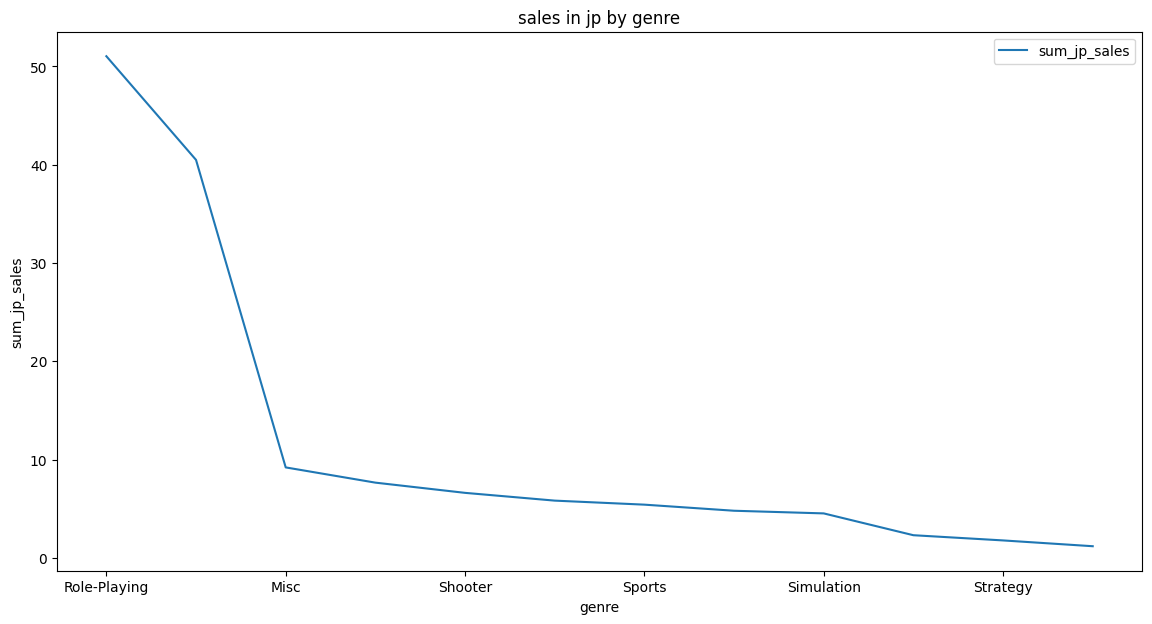

In [64]:
data_jp.sort_values('sum_jp_sales',ascending = False).plot(y = 'sum_jp_sales',figsize=(14,7),title ='sales in jp by genre',ylabel = 'sum_jp_sales')

выводы по жанрам : европа и северная америка очень похожи по показателям друг на друга преобладают экшены и шутеры , также не плохо  продаются спортивные и ролевые игры. В японии преобладают ролевые игры и экшен.

In [65]:
data_na = actual_data.pivot_table(index = 'rating',values = ['na_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_na.columns = ['_'.join(col).rstrip('_') for col in data_na.columns.values]
data_na.sort_values('sum_na_sales',ascending = False)

,mean_na_sales,median_na_sales,max_na_sales,min_na_sales,count_na_sales,sum_na_sales
rating,,,,,,
18,0.447724,0.14,9.66,0.0,369,165.21
0,0.264899,0.05,3.15,0.0,298,78.94
11,0.216080,0.12,2.49,0.0,250,54.02
14,0.149520,0.04,2.78,0.0,333,49.79


<AxesSubplot: title={'center': 'sales in na by rating'}, xlabel='rating', ylabel='sum_na_sales'>

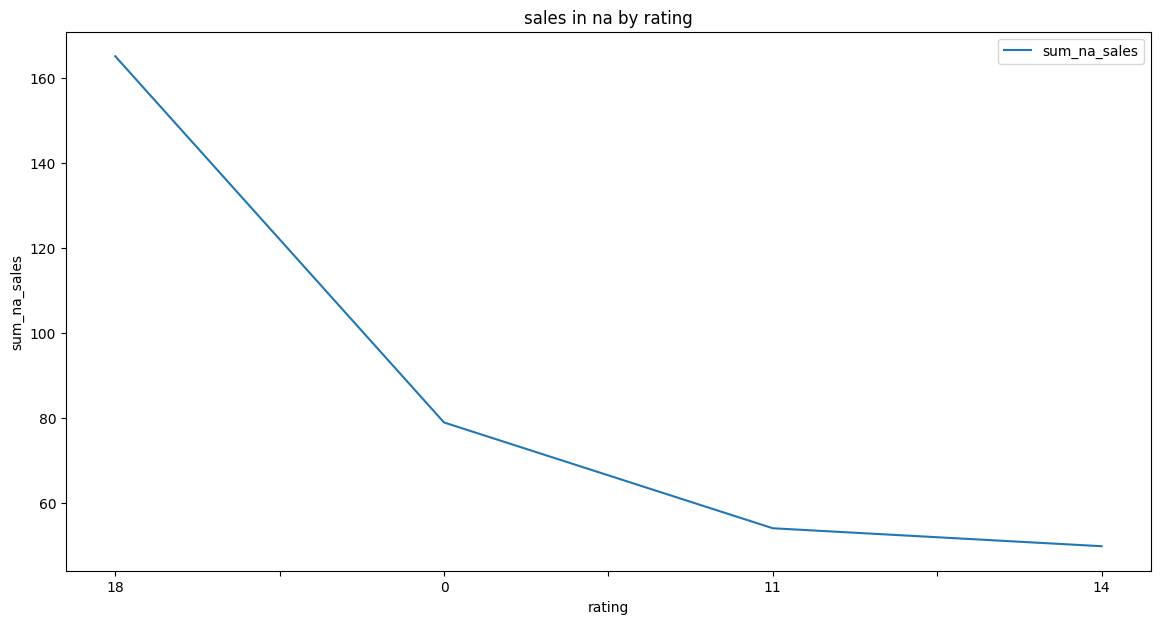

In [66]:
data_na.sort_values('sum_na_sales',ascending = False).plot(y = 'sum_na_sales',figsize=(14,7),title ='sales in na by rating',ylabel = 'sum_na_sales')

In [67]:
data_eu = actual_data.pivot_table(index = 'rating',values = ['eu_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_eu.columns = ['_'.join(col).rstrip('_') for col in data_eu.columns.values]
data_eu.sort_values('sum_eu_sales',ascending = False)

,mean_eu_sales,median_eu_sales,max_eu_sales,min_eu_sales,count_eu_sales,sum_eu_sales
rating,,,,,,
18,0.393821,0.13,9.09,0.0,369,145.32
0,0.278423,0.05,6.12,0.0,298,82.97
11,0.170120,0.10,1.39,0.0,250,42.53
14,0.125976,0.04,2.50,0.0,333,41.95


<AxesSubplot: title={'center': 'sales in eu by rating'}, xlabel='rating', ylabel='sum_eu_sales'>

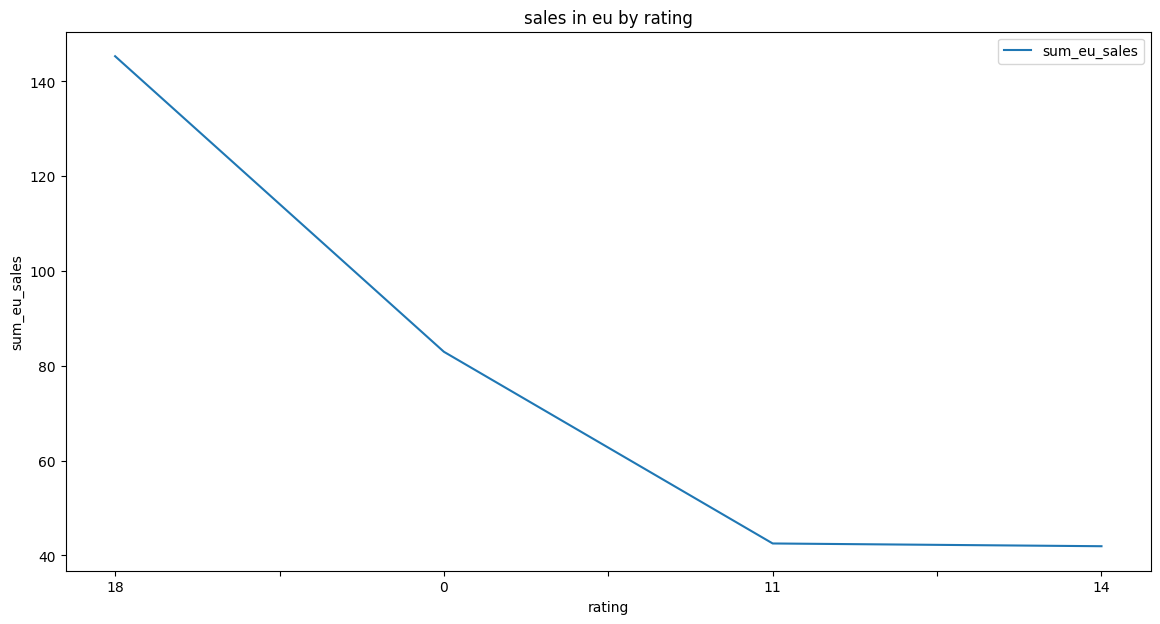

In [68]:
data_eu.sort_values('sum_eu_sales',ascending = False).plot(y = 'sum_eu_sales',figsize=(14,7),title ='sales in eu by rating',ylabel = 'sum_eu_sales')

In [69]:
data_jp = actual_data.pivot_table(index = 'rating',values = ['jp_sales'],aggfunc = ['mean','median','max','min','count','sum'])
data_jp.columns = ['_'.join(col).rstrip('_') for col in data_jp.columns.values]
data_jp.sort_values('sum_jp_sales',ascending = False)

,mean_jp_sales,median_jp_sales,max_jp_sales,min_jp_sales,count_jp_sales,sum_jp_sales
rating,,,,,,
14,0.061832,0.01,2.62,0.0,333,20.59
0,0.050805,0.00,1.40,0.0,298,15.14
18,0.038238,0.00,0.98,0.0,369,14.11
11,0.023560,0.00,1.46,0.0,250,5.89


<AxesSubplot: title={'center': 'sales in jp by rating'}, xlabel='rating', ylabel='sum_jp_sales'>

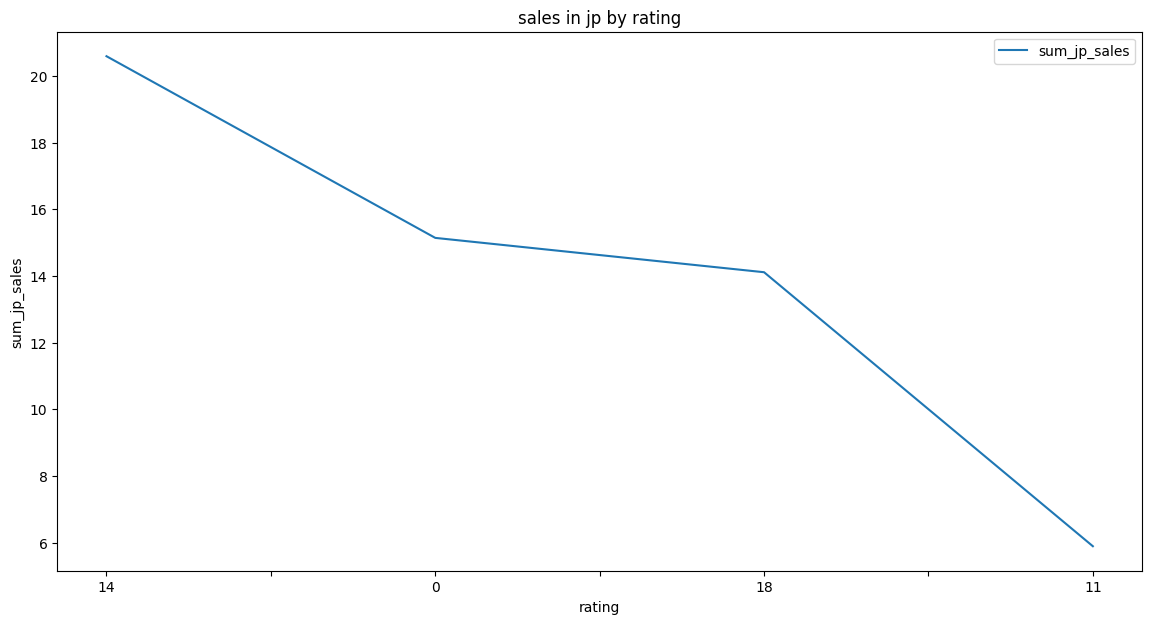

In [70]:
data_jp.sort_values('sum_jp_sales',ascending = False).plot(y = 'sum_jp_sales',figsize=(14,7),title ='sales in jp by rating',ylabel = 'sum_jp_sales')

вывод по рейтингу : в европе и сша преобладает рейтинг 18+ , не удивительно большинство ААА проектов находятся в жанрах Экшен и Шутеры , а в них практически всегда рейтинг 18+,в то время в японии из-за специфики жанров такого разброса нет 

общий вывод по регионам : сша и европа очень похожи друг на друга , япония сильно отличается по потребителям (в общем выводе опишу целевую аудиторию) 

In [71]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,...,all_sales,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,...,21.05,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,...,16.27,NaN,16.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,...,14.63,NaN,NaN,14.63,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,...,14.60,NaN,NaN,NaN,14.6,NaN,NaN,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,...,12.62,NaN,NaN,12.62,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01


H0 = Средние пользовательские рейтинги платформ Xbox One = PC 
<br>H1 = Средние пользовательские рейтинги платформ Xbox One != PC 

In [72]:
array_XOne = actual_data[actual_data['platform']=='XOne']['user_score'].dropna().to_numpy()
array_PC = actual_data[actual_data['platform']=='PC']['user_score'].dropna().to_numpy()
st.ttest_ind(array_XOne,array_PC,equal_var = True)

Ttest_indResult(statistic=1.4788255981357246, pvalue=0.1401265840361173)

In [73]:
array_XOne = actual_data[actual_data['platform']=='XOne']['user_score'].dropna().to_numpy()
array_PC = actual_data[actual_data['platform']=='PC']['user_score'].dropna().to_numpy()
ttest_result = st.ttest_ind(array_XOne,array_PC,equal_var = True)
alpha = 0.05
if ttest_result.pvalue >= alpha:
    print('гипотезу не удалось опровергнуть')
else:
    print('гипотезу удалось опровергнуть')
ttest_result.pvalue

гипотезу не удалось опровергнуть


0.1401265840361173

гипотезу не удалось опровергнуть

H0 = Средние пользовательские рейтинги жанров Action != Sports
<br>H1 = Средние пользовательские рейтинги жанров Action = Sports

In [74]:
array_XOne = actual_data[actual_data['genre']=='Action']['user_score'].dropna().to_numpy()
array_PC = actual_data[actual_data['genre']=='Sports']['user_score'].dropna().to_numpy()
ttest_result = st.ttest_ind(array_XOne,array_PC,equal_var = True)
alpha = 0.05
if ttest_result.pvalue <= alpha:
    print('гипотезу не удалось опровергнуть')
else:
    print('гипотезу удалось опровергнуть')
ttest_result.pvalue

гипотезу не удалось опровергнуть


7.102366533466782e-28

<b>вывод:</b>
<br>основная информация с которой мы работали это all_sales ,platform ,year_of_release ,также предобработали rating,user_score и использовали все столбцы дата сета без исключения<br><br>
в общем виде сильнее всего влияет на успешность игры платформа на которую выходит игра,оценка критиков и жанр игры<br><br>
портрет удачной игры: выпущена под актуальное поколение консолей в жанре шутер/ролевая игра/экшен и получившая хорошие оценки критиков, <br>
портрет неудачной игры:выпущена на портативные устройства(неактуального/в последний год текущего поколения) в жанре пазлы/стратегии и получившая низкую оценку критиков <br><br>
рекомендация для заказчика: полезным было бы ещё собирать информацию о стоимости игры , чтобы посмотреть как этот фактор зависит на количество скачиваний 